# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Homework #4
## Rui Fang $\quad$ Collaborator: /
**Harvard University**<br>
**Spring 2017**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Friday, Febrary 23rd, 2018 at 11:00am

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

## Problem 1: Optimization (contd)

Suppose you are building a pricing model for laying down telecom cables over a geographical region. Your model takes as input a pair of  coordinates, $(x, y)$, and contains two parameters, $\lambda_1, \lambda_2$. Given a coordinate, $(x, y)$, and model parameters, the loss in revenue corresponding to the price model at location $(x, y)$ is described by
$$
L(x, y, \lambda_1, \lambda_2) = 0.000045\lambda_2^2 y - 0.000098\lambda_1^2 x  + 0.003926\lambda_1 x\exp\left\{\left(y^2 - x^2\right)\left(\lambda_1^2 + \lambda_2^2\right)\right\}
$$
Read the data contained in `HW3_data.csv`. This is a set of coordinates configured on the curve $y^2 - x^2 = -0.1$. Given the data, find parameters $\lambda_1, \lambda_2$ that minimize the net loss over the entire dataset.

### Part A: Further problems with descent algorithms
Using your implementation of gradient descent and stochastic gradient descent, document the behaviour of your two algorithms for the following starting points, and for a number of stepsizes of your choice:
- $(\lambda_1, \lambda_2) = (-2.47865, 0)$
- $(\lambda_1, \lambda_2) = (-3, 0)$
- $(\lambda_1, \lambda_2) = (-5, 0)$
- $(\lambda_1, \lambda_2) = (-10, 0)$
Based on your analysis of the loss function $L$, explain what is happening to your descent algorithms.

***
## Solution

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import time

%matplotlib notebook

sns.set()

In [41]:
# Loss function 
def loss(x, y, lmd1, lmd2):
    return np.sum(0.000045*lmd2**2*y - 0.000098*lmd1**2*x + 0.003926*lmd1*x*np.exp((y**2-x**2)*(lmd1**2+lmd2**2)))


# Gradient of the loss function with respect to lambda1, lambda2 
def loss_grad(x, y, lmd1, lmd2):
    dLdlmd1 = -2*0.000098*lmd1*x + 0.003926*x*np.exp((y**2-x**2)*(lmd1**2+lmd2**2))*(1+(y**2-x**2)*2*lmd1**2)
    dLdlmd2 = 2*0.000045*lmd2*y + 0.003926*lmd1*x*np.exp((y**2-x**2)*(lmd1**2+lmd2**2))*(y**2-x**2)*2*lmd2
    return np.array([np.sum(dLdlmd1), np.sum(dLdlmd2)])


# Implement gradient descent (adapted from sample code given in lecture)
def gradient_descent(x, y, lmd_init, lr=0.001, maxsteps=0, precision=0.001):
    
    # To store all losses and parameters 
    loss_history = []
    lmd_history = [] 
    
    # Initial set up 
    counter = 0
    lmd = lmd_init
    current_loss = loss(x, y, lmd[0], lmd[1])
    
    # Save initial results
    lmd_history.append(lmd)
    loss_history.append(current_loss)
    
    counter += 1
    
    # Do gradient descent update while the diff. between current loss and known minimum loss is above precision
    while abs(current_loss - min_loss) > precision:

        # Update parameters, compute new loss over entire dataset 
        gradient = loss_grad(x, y, lmd[0], lmd[1])
        lmd = lmd - lr * gradient
        current_loss = loss(x, y, lmd[0], lmd[1])
        
        # Save results 
        lmd_history.append(lmd)
        loss_history.append(current_loss)
         
        counter+=1
        
        # Stop gradient descent when the maximum num of steps is achieved  
        if maxsteps:
            if counter == maxsteps:
                break
        
    return loss_history, lmd_history, counter


# Implement stochastic gradient descent (adapted from sample code given in lecture)
def stochastic_gradient_descent(x, y, lmd_init, lr=0.001, maxsteps=0, precision=0.001):
    
    # To store all losses and parameters 
    loss_history = []
    lmd_history = [] 
    
    # Number of data points
    m = y.size 
    
    # Initial set up 
    counter = 0
    lmd = lmd_init
    current_loss = loss(x, y, lmd[0], lmd[1])
    old_loss = 0
    i = 0 # index of data point
    
    # Save initial results 
    loss_history.append(current_loss)
    lmd_history.append(lmd)
    
    counter += 1
    
    # Do gradient descent update while the diff. between current loss and known minimum loss is above precision
    while abs(current_loss - min_loss) > precision:
        old_loss = current_loss
        
        # Update parameters using gradient evaluation of one data point, scaled with the dataset size 
        gradient = loss_grad(x[i], y[i], lmd[0], lmd[1])
        lmd = lmd - lr * gradient * m
        
        # Compute new loss over entire dataset 
        current_loss = loss(x, y, lmd[0], lmd[1])
        
        # Save results 
        loss_history.append(current_loss)
        lmd_history.append(lmd)

        counter += 1
        
        i += 1
        if i == m: # reached one past the end
            i = 0
            neworder = np.random.permutation(m)
            x = x[neworder]
            y = y[neworder]
            
        if maxsteps:
            if counter == maxsteps:
                break
        
    return loss_history, lmd_history, counter

In [99]:
# Load in data
data = np.loadtxt('HW3_data.csv', delimiter=',')
data = data.T
X = data[:,0]
Y = data[:,1]
neworder = np.random.permutation(X.size)
X_shuffled = X[neworder]
Y_shuffled = Y[neworder]

# Known minimum 
min_loss = loss(X, Y, 2.05384, 0)

# Four starting points 
lmd_init1 = np.array([-2.47865, 0])
lmd_init2 = np.array([-3, 0])
lmd_init3 = np.array([-5, 0])
lmd_init4 = np.array([-10, 0])

<IPython.core.display.Javascript object>


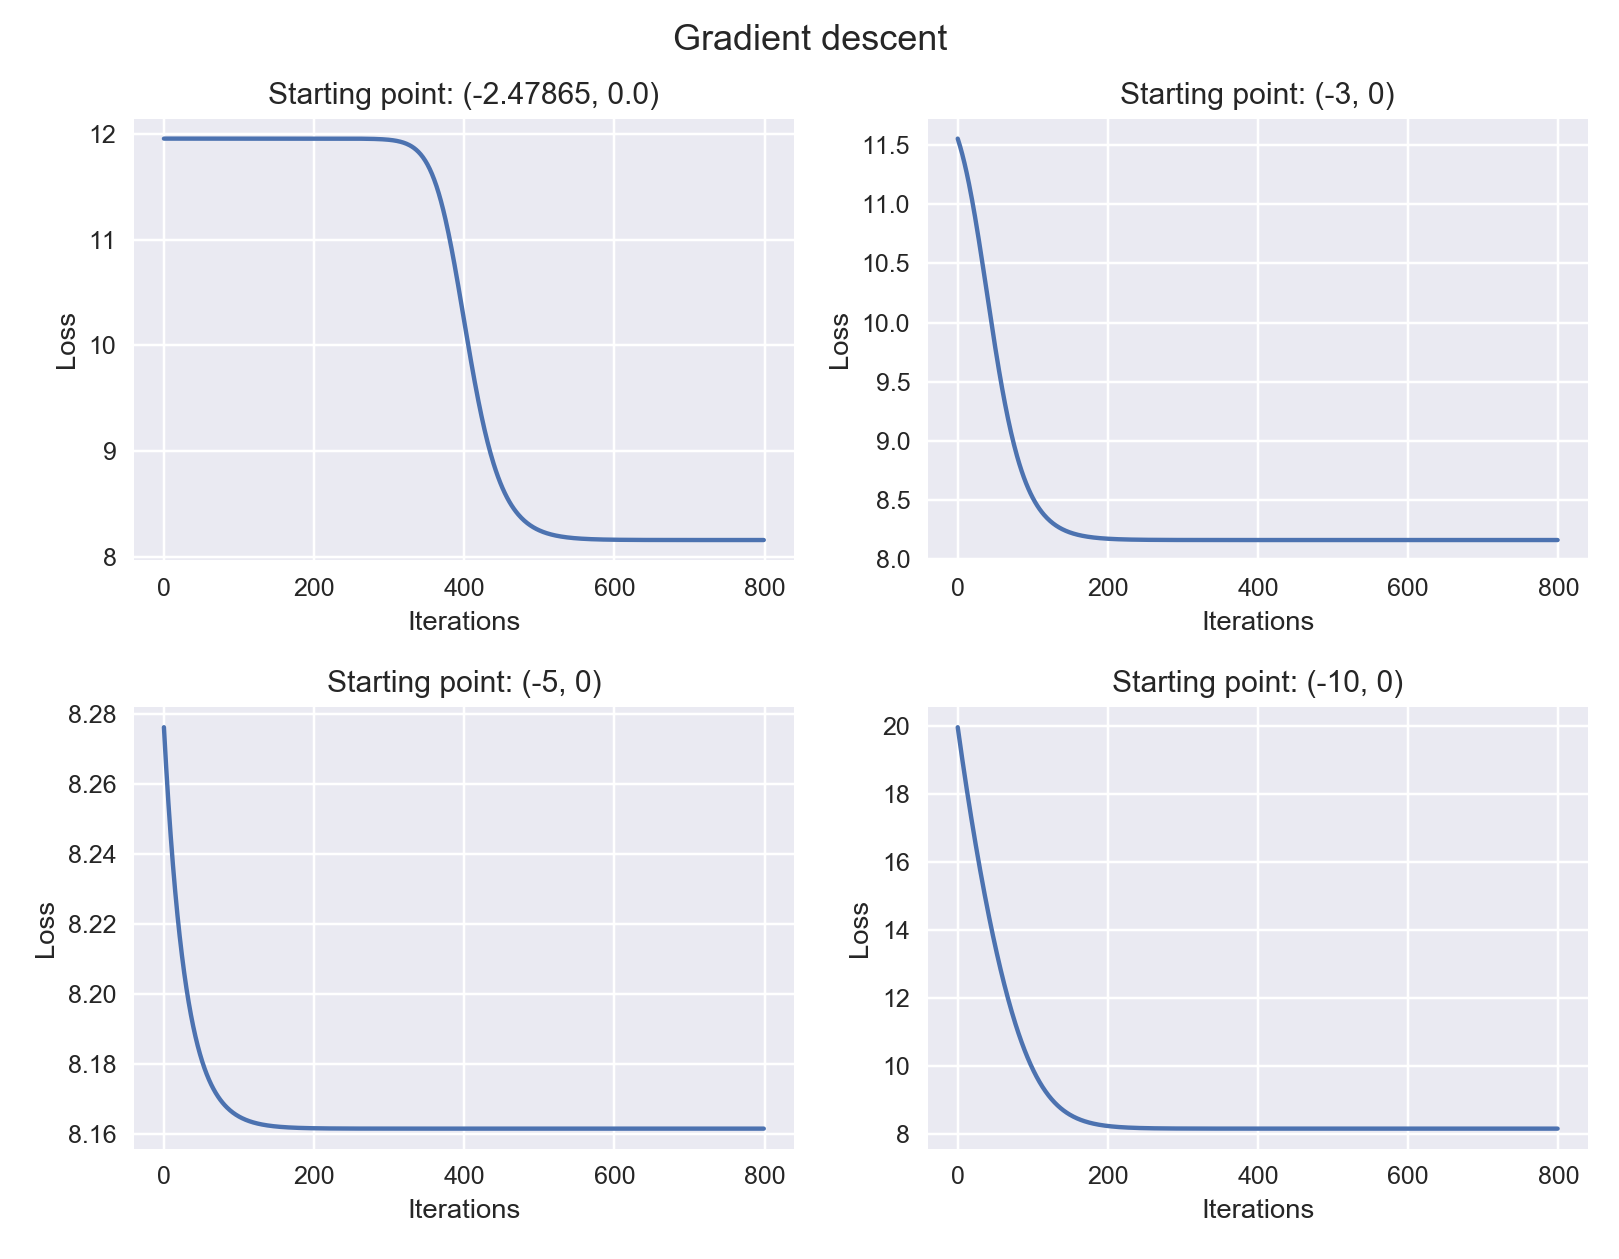

<IPython.core.display.Javascript object>


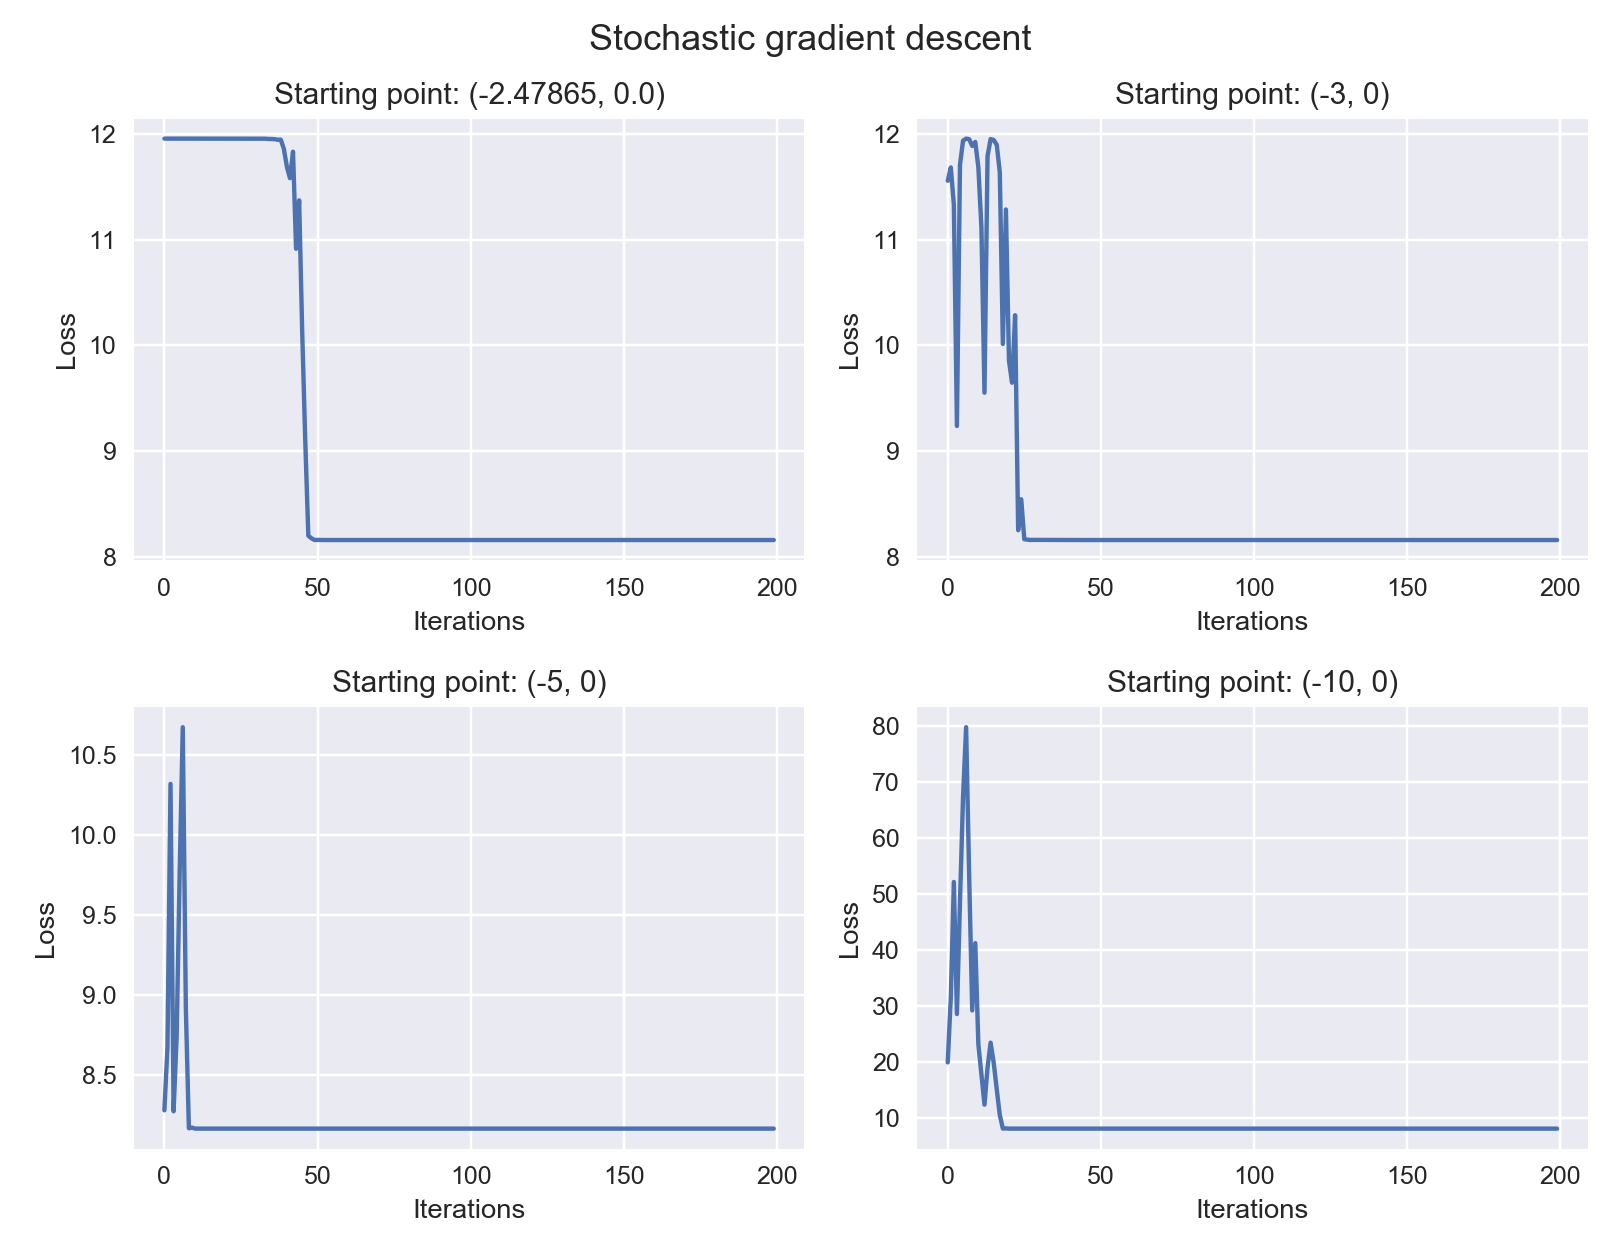

In [137]:
fig, axes = plt.subplots(2, 2, figsize=(9,7))
for i, lmd_init in enumerate([lmd_init1, lmd_init2, lmd_init3, lmd_init4]):
    loss_history, _, _ = gradient_descent(X, Y, lmd_init, lr=0.01, maxsteps=800, precision=0.001)
    ax = axes.flatten()[i]
    ax.plot(loss_history)
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Loss')
    ax.set_title('Starting point: (%s, %s)' % (lmd_init[0], lmd_init[1]))
fig.suptitle('Gradient descent')
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(9,7))
for i, lmd_init in enumerate([lmd_init1, lmd_init2, lmd_init3, lmd_init4]):
    loss_history, _, _ = stochastic_gradient_descent(X_shuffled, Y_shuffled, lmd_init, 
                                                     lr=0.001, maxsteps=200, precision=0.001)
    ax = axes.flatten()[i]
    ax.plot(loss_history)
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Loss')
    ax.set_title('Starting point: (%s, %s)' % (lmd_init[0], lmd_init[1]))
fig.suptitle('Stochastic gradient descent')
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

According to the results, both GD and SGD for all four starting points converge to loss=8.16 at $(\lambda_1, \lambda_2) = (-5.36325804, 0)$. However, this is not the global minimum, but a local minimum, as visualized in the loss contour below. The four starting points lie around this local minimum. In other words, the negative gradients of these points point toward the local minimum. Therefore, using gradient descent algorithm will lead to convergence to the local minimum, same as what we observed. In addition, starting at $(-3, 0)$, $(-5, 0)$ or $(-10, 0)$ converges faster than starting at $(-2.47865, 0)$ when using the same stepsize. This is because (-2.47865, 0) is in the center of a plateau, where the gradient is very small. Hence it takes more steps to get out. For stochastic gradient descent, starting at these four points also converge to the local minimum given stepsize=0.001. Using larger stepsize (i.e. 0.01) would cause the loss to go to infinity. 

<IPython.core.display.Javascript object>


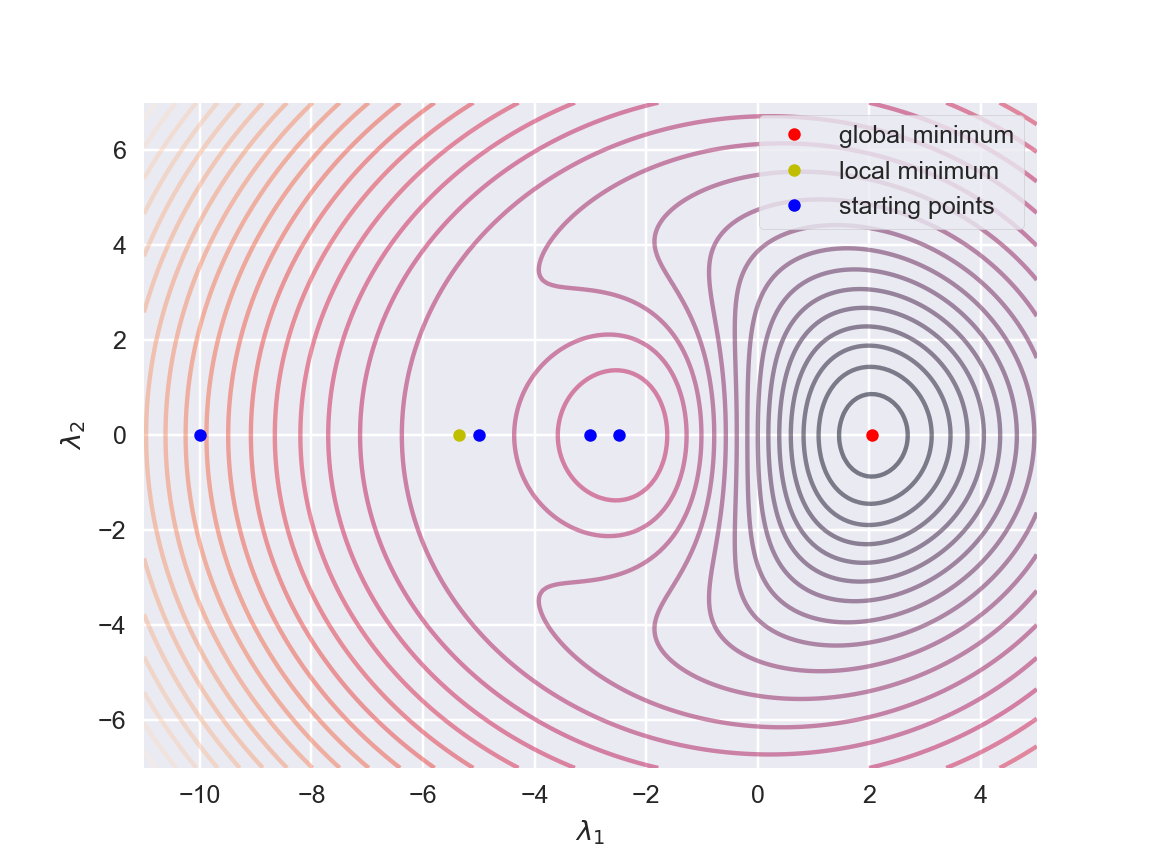

In [133]:
# Visualize contour of loss surface 
lmd1_grid, lmd2_grid = np.meshgrid(np.linspace(-11, 5, 200), np.linspace(-7, 7, 200))
loss_grid = np.zeros(lmd1_grid.shape)
for i in range(200):
    for j in range(200):
        loss_grid[i,j] = loss(X, Y, lmd1_grid[i, j], lmd2_grid[i, j])

starting_points = np.array([lmd_init1, lmd_init2, lmd_init3, lmd_init4])

plt.figure()
plt.contour(lmd1_grid, lmd2_grid, loss_grid, 40, offset=min_loss, color='b', alpha=0.5)
plt.plot([2.05384], [0], 'ro', markersize=5, label='global minimum')
plt.plot([-5.36325804], [0], 'yo', markersize=5, label='local minimum')
plt.plot(starting_points[:,0], starting_points[:,1], 'bo', markersize=5, label='starting points')
plt.xlabel(r'$\lambda_1$')
plt.ylabel(r'$\lambda_2$')
plt.legend(frameon=True)
plt.show()

***

## Problem 2: Logistic Regression and MNIST (contd)




The MNIST dataset is one of the classic datasets in Machine Learning and is often one of the first datasets against which new classification algorithms test themselves. It consists of 70,000 images of handwritten digits, each of which is 28x28 pixels. 

Last time you used PyTorch to build a handwritten digit multi-class logistic regression classifier that you trained and tested with MNIST dataset.

We'll introduce validation sets and regularization in this problem.

Using the softmax formulation, write a PyTorch model that computes the cost function using an L2 regularization approach (see `optim.SGD` in PyTorch or write your own cost function) and minimizes the resulting cost function using mini-batch stochastic gradient descent.

Construct and train your classifier using a batch size of 256 examples, a learning rate η=0.1, and a regularization factor λ=0.01.

1. Using classification accuracy, evaluate how well your model is performing on the validation set at the end of each epoch. Plot this validation accuracy as the model trains. 
2. Duplicate this plot for some other values of the regularization parameter $\lambda$. When should you stop the training for different values of λ? Give an approximate answer supported by using the plots.
3. Select what you consider the best regularization parameter and predict the labels of the test set. Compare with the given labels. What classification accuracy do you obtain on the test set?

*** 

## Solution

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dset
from torch.utils.data.sampler import SubsetRandomSampler
from torch.autograd import Variable
import torch.nn as nn
from tqdm import tnrange, tqdm_notebook

In [28]:
# Define multinomial logistic regression model
class LR(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

# Define logistic regression classier interface to wrap up the fitting process (referenced lab4)
class LRClassifier:
    def __init__(self, input_dim=784, output_dim=10):
        self._pytorch_model = LR(input_dim, output_dim)
        self._criterion = nn.CrossEntropyLoss()
        self._fit_params = dict(batch_size=256, 
                                lr=0.1, 
                                l2_decay_rate=0.01, 
                                num_epochs=10)
        self._optim = torch.optim.SGD(self._pytorch_model.parameters(), 
                                      lr=self._fit_params['lr'], 
                                      weight_decay=self._fit_params['l2_decay_rate'])
    
    def set_fit_params(self, *, batch_size=256, lr=0.1, l2_decay_rate=0.01, num_epochs=10):
        self._fit_params['batch_size'] = batch_size
        self._fit_params['lr'] = lr
        self._fit_params['l2_decay_rate'] = l2_decay_rate
        self._fit_params['num_epochs'] = num_epochs
        self._optim = torch.optim.SGD(self._pytorch_model.parameters(), 
                                      lr = self._fit_params['lr'],
                                      weight_decay=self._fit_params['l2_decay_rate'])
    
    def fit(self, train_set):
        
        # Split our training set into training and validation sets (code adapted from lab4)
        indices = list(range(len(train_set)))  # start with all the indices in training set
        split = 10000  # define the split size
        validation_idx = np.random.choice(indices, size=split, replace=False)  # random, non-contiguous split
        train_idx = list(set(indices) - set(validation_idx))

        # Define our samplers
        train_sampler = SubsetRandomSampler(train_idx)
        validation_sampler = SubsetRandomSampler(validation_idx)

        # Create data loaders 
        train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                                   batch_size=self._fit_params['batch_size'], 
                                                   sampler=train_sampler)
        validation_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                                        batch_size=self._fit_params['batch_size'], 
                                                        sampler=validation_sampler)
        
        # To store validation accuracy over epochs 
        self._validation_accuracy_history = []
        
        for epoch in tnrange(self._fit_params['num_epochs']):
            
            # Train the model with SGD
            for data in train_loader:
                inputs, labels = data
                inputs = Variable(inputs)
                labels = Variable(labels)
                outputs = self._pytorch_model(inputs.view(-1, 784))  # forward pass
                loss = self._criterion(outputs, labels)  # compute loss 
                self._optim.zero_grad()  # zero gradients
                loss.backward()  # backward pass
                self._optim.step()  # update weights 
            
            # Compute classification accuracy on validation set 
            validation_set_correct = 0
            for data in validation_loader:
                inputs, labels = data
                outputs = self._pytorch_model(Variable(inputs).view(-1, 784))  # forward pass 
                _, predicted = torch.max(outputs.data, 1)  # predict class labels 
                validation_set_correct += (predicted == labels).sum()  
            self._validation_accuracy_history.append(validation_set_correct/len(validation_idx))
            
    def plot_validation_accuracy(self):
        plt.figure()
        plt.plot(self._validation_accuracy_history, '-')
        plt.xlabel('Epoch')
        plt.ylabel('Validation accuracy')
        plt.legend(['batch_size=%s \nlearning_rate=%s \nl2_decay_rate=%s' % 
                    (self._fit_params['batch_size'], 
                     self._fit_params['lr'],
                     self._fit_params['l2_decay_rate'])], loc='best', frameon=True)
        plt.show()
    
    def report_test_accuracy(self, test_set):
        test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                                  batch_size=self._fit_params['batch_size'], 
                                                  shuffle=False)
        
        test_set_correct = 0
        for data in test_loader:
            inputs, labels = data
            outputs = self._pytorch_model(Variable(inputs).view(-1, 784))
            _, predicted = torch.max(outputs.data, 1)
            test_set_correct += (predicted == labels).sum()
        
        print('Test set accuracy:', test_set_correct/len(test_set))

A Jupyter Widget

<IPython.core.display.Javascript object>


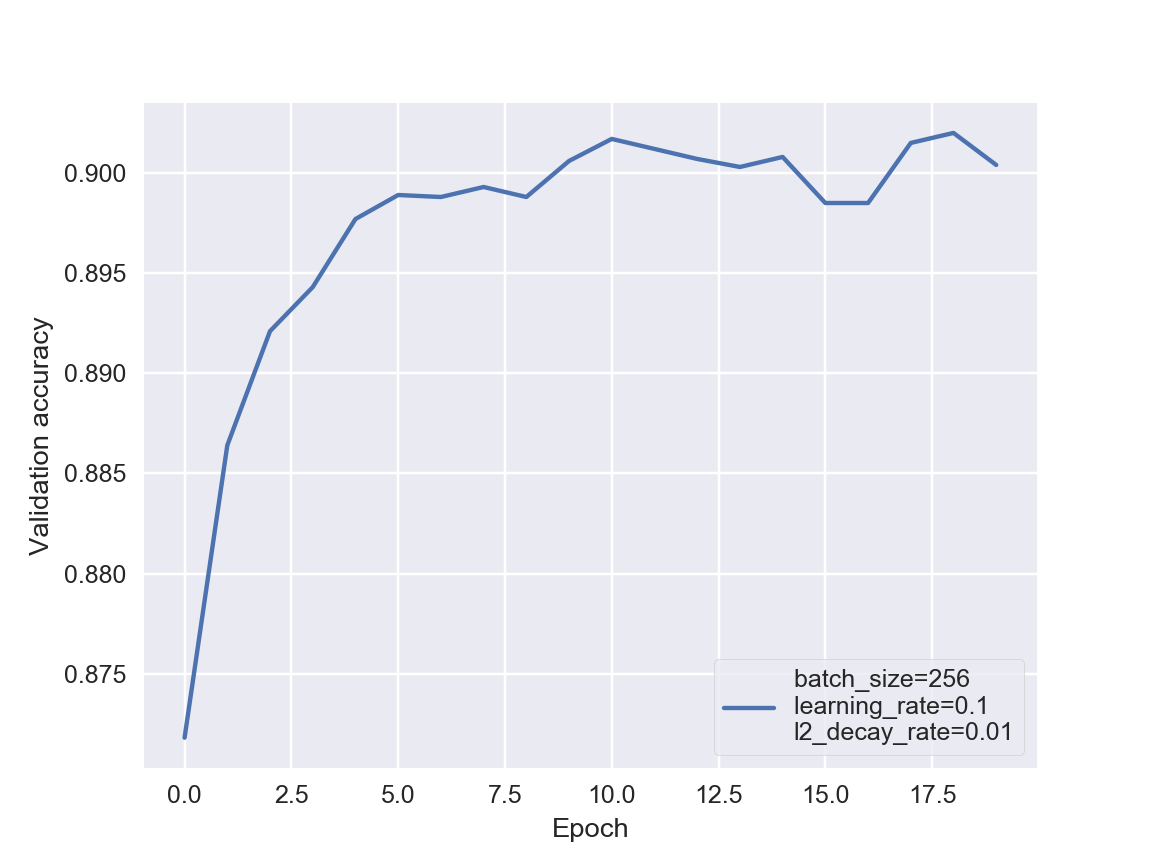

In [31]:
# Load in data 
root = './data'
train_set = dset.MNIST(root=root, train=True, transform=transforms.ToTensor(), download=True)
test_set = dset.MNIST(root=root, train=False, transform=transforms.ToTensor(), download=True)

# Construct and train the classifier using a batch size of 256 examples, a learning rate η=0.1, 
# and a regularization factor λ=0.01
lrc = LRClassifier()
lrc.set_fit_params(batch_size=256, lr=0.1, l2_decay_rate=0.01, num_epochs=20)
lrc.fit(train_set)
lrc.plot_validation_accuracy()

A Jupyter Widget

<IPython.core.display.Javascript object>


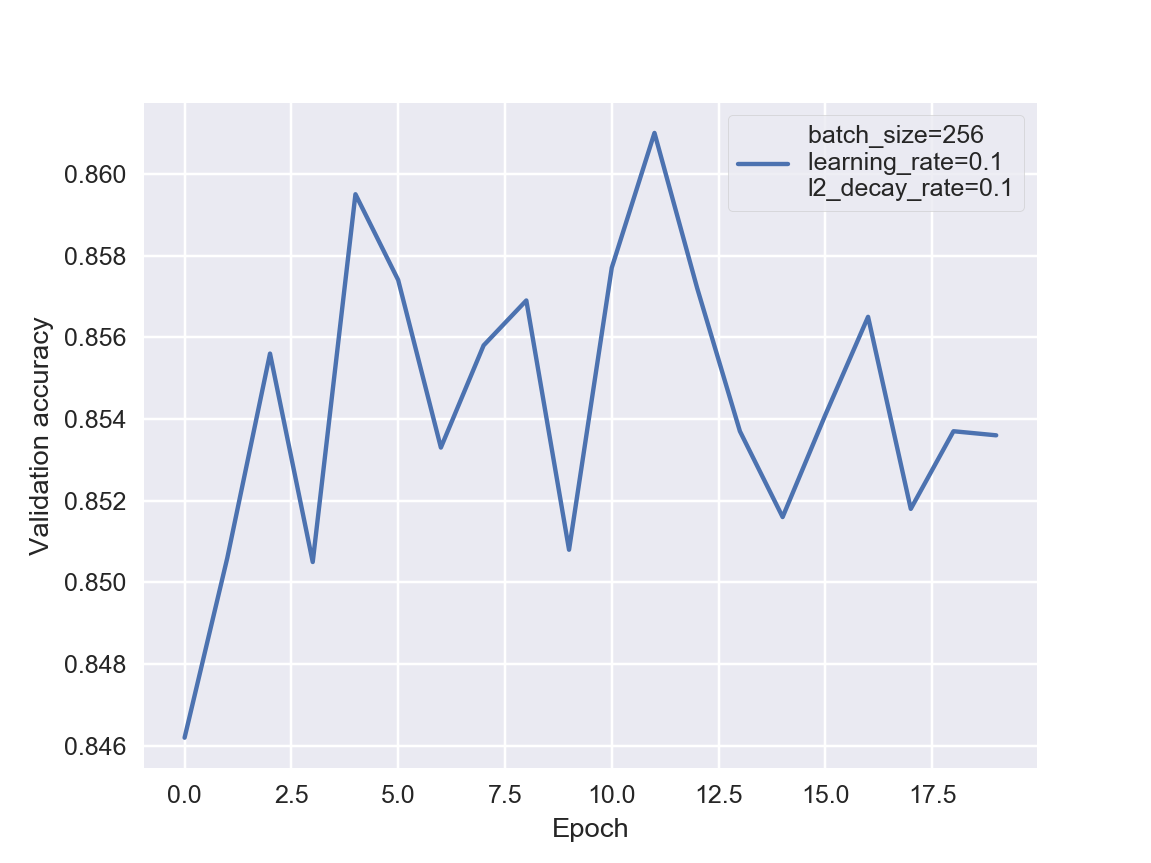

In [32]:
# Use a different regularization factor λ=0.1
lrc2 = LRClassifier()
lrc2.set_fit_params(batch_size=256, lr=0.1, l2_decay_rate=0.1, num_epochs=20)
lrc2.fit(train_set)
lrc2.plot_validation_accuracy()

A Jupyter Widget

<IPython.core.display.Javascript object>


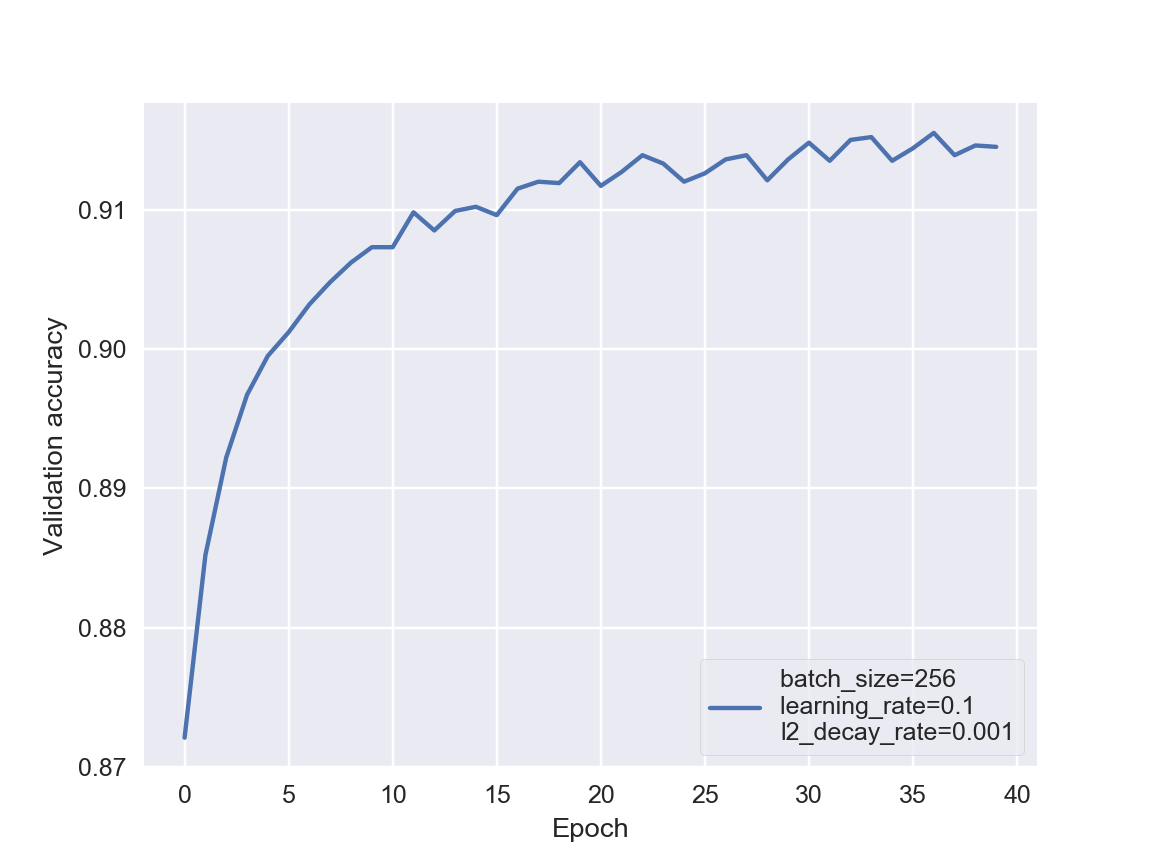

In [33]:
# Use a different regularization factor λ=0.001
lrc3 = LRClassifier()
lrc3.set_fit_params(batch_size=256, lr=0.1, l2_decay_rate=0.001, num_epochs=40)
lrc3.fit(train_set)
lrc3.plot_validation_accuracy()

A Jupyter Widget

<IPython.core.display.Javascript object>


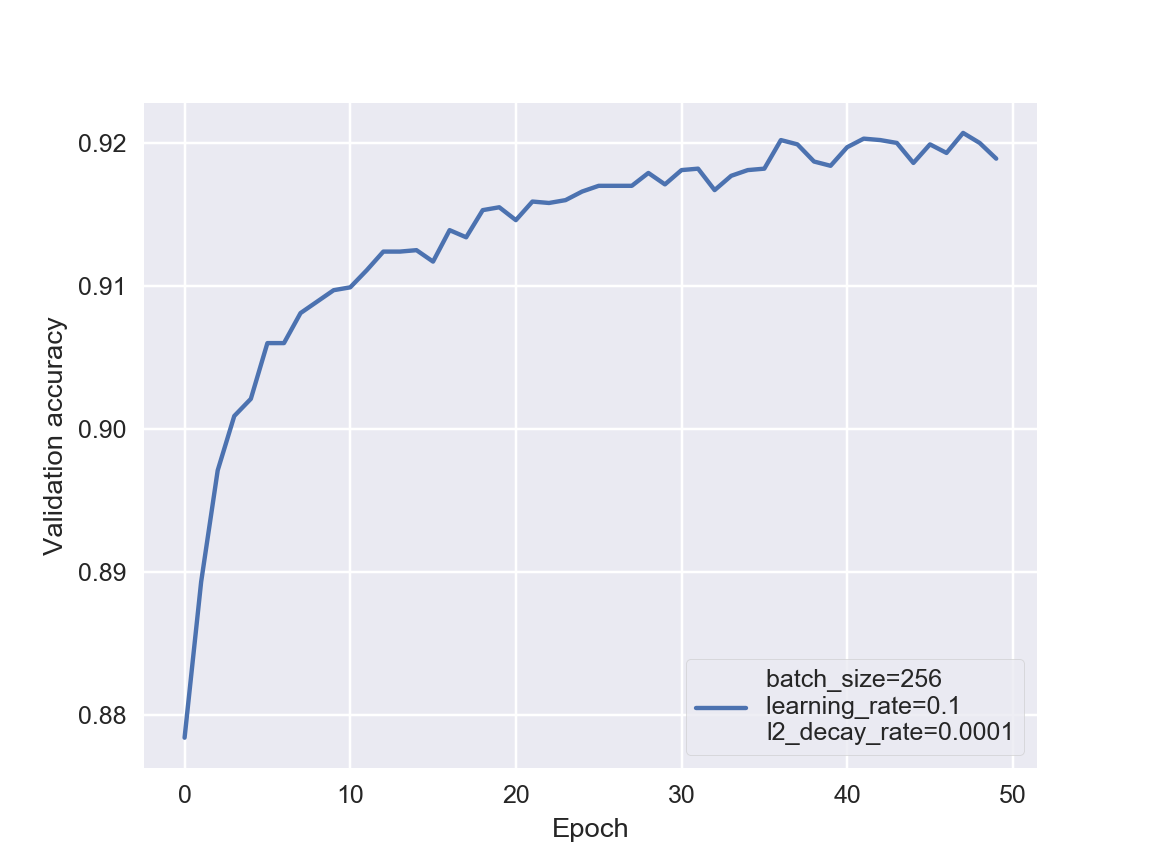

In [34]:
# Use a different regularization factor λ=0.0001
lrc4 = LRClassifier()
lrc4.set_fit_params(batch_size=256, lr=0.1, l2_decay_rate=0.0001, num_epochs=50)
lrc4.fit(train_set)
lrc4.plot_validation_accuracy()

We constructed and trained the classifier with a batch size of 256 examples, a learning rate η=0.1 and four different regularization factors (λ=0.1, 0.01, 0.001, 0.0001). During training, we recorded the classification accuracy on a validation set at the end of each epoch. Based on the Validation accuracy vs Epoch plots, we found that for λ=0.1 the model does not converge. For the rest of λ's where the model converges, we can roughly estimate when we should stop training based on when the validation accuracy curve flattens out or begins decreasing. The appropriate number of epochs is about **10** for **λ=0.01**, **30** for **λ=0.001** and **40** for **λ=0.0001**. 

Among λ=0.01, 0.001, 0.0001, the highest final validation accuracy is given by λ=0.0001. Therefore, we use this model to predict the labels of the test set and report the classification accuracy:

In [36]:
lrc4.report_test_accuracy(test_set)

Test set accuracy: 0.923


***

## Problem 3: Multi-Layer Perceptron

The multilayer perceptron can be understood as a logistic regression classifier in which the input is first transformed using a learnt non-linear transformation. The non-linear transformation is usually chosen to be either the logistic function or the $\tanh$ function or the RELU function, and its purpose is to project the data into a space where it becomes linearly separable The output of this so-called hidden layer is then passed to the logistic regression graph that we have constructed in the first problem. 

![](http://deeplearning.net/tutorial/_images/mlp.png)

We'll construct a model with **1 hidden layer**. That is, you will have an input layer with a nonlinearity, then a hidden layer with the nonlinearity, and finally a cross-entropy (or equivalently log-softmax with a log-loss)


Using a similar architecture as in the first part and the same training, validation, and test sets, build a PyTorch model for the multilayer perceptron. Use the $\tanh$ function as the non-linear activation function. 

1. Use $\lambda = 0.001$ to compare with Problem 2. Experiment with the learning rate (try 0.1 and 0.01 for example), batch size (use 20, 50, 100 and 200) and the number of units in your hidden layer (use between 25 and 100 units). For what combination of these parameters do you obtain the highest validation accuracy after a resonable number of epochs that lead to convergence ( start at 10 epochs and play around a bit for convergence)? How does your test accuracy compare to the logistic regression classifier?
2. Try the same values of $\lambda$ you used in Question 2. Does the test set accuracy improve?


*Hint #1:* The initialization of the weights matrix for the hidden layer must assure that the units (neurons) of the perceptron operate in a regime where information gets propagated. For the $\tanh$ function, you may find it advisable to initialize with the interval $[-\sqrt{\frac{6}{fan_{in}+fan_{out}}},\sqrt{\frac{6}{fan_{in}+fan_{out}}}]$, where $fan_{in}$ is the number of units in the $(i-1)$-th layer, and $fan_{out}$ is the number of units in the i-th layer.

*Hint #2*
Train/Validate/Test split can be done in numpy or in PyTorch. Lab will describe a way to do it keeping within the MNIST `DataLoader` workflow: the key is to pass a `SubsetRandomSampler` to `DataLoader`: see the docs.

***

## Solution

In [138]:
import torch.nn.functional as F
import torch.nn.init 


# Define multi-layer perceptron class
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, nonlinearity):
        super(MLP, self).__init__()
        self.l1 = nn.Linear(input_dim, hidden_dim)
        torch.nn.init.xavier_uniform(self.l1.weight)
        torch.nn.init.constant(self.l1.bias, 0.0)
        self.l2 = nn.Linear(hidden_dim, output_dim)
        self.nonlinearity = nonlinearity
    
    def forward(self, x):
        x = self.nonlinearity(x)
        x = self.l1(x)
        x = self.nonlinearity(x)
        x = self.l2(x)
        return x

# Define MLP classier interface to wrap up the fitting process (referenced lab4)
class MLPClassifier:
    def __init__(self, input_dim=784, hidden_dim=25, output_dim=10, nonlinearity=F.tanh):
        self._pytorch_model = MLP(input_dim, hidden_dim, output_dim, nonlinearity)
        self._criterion = nn.CrossEntropyLoss()
        self._fit_params = dict(batch_size=256, 
                                lr=0.1, 
                                l2_decay_rate=0.01, 
                                num_epochs=10)
        self._optim = torch.optim.SGD(self._pytorch_model.parameters(), 
                                      lr=self._fit_params['lr'], 
                                      weight_decay=self._fit_params['l2_decay_rate'])
        self.hidden_dim = hidden_dim 
        
    def set_fit_params(self, batch_size=256, lr=0.1, l2_decay_rate=0.01, num_epochs=10):
        self._fit_params['batch_size'] = batch_size
        self._fit_params['lr'] = lr
        self._fit_params['l2_decay_rate'] = l2_decay_rate
        self._fit_params['num_epochs'] = num_epochs
        self._optim = torch.optim.SGD(self._pytorch_model.parameters(), 
                                      lr = self._fit_params['lr'],
                                      weight_decay=self._fit_params['l2_decay_rate'])
    
    def fit(self, train_set):
        
        # Split our training set into training and validation sets (code adapted from lab4)
        indices = list(range(len(train_set)))  # start with all the indices in training set
        split = 10000  # define the split size
        validation_idx = np.random.choice(indices, size=split, replace=False)  # random, non-contiguous split
        train_idx = list(set(indices) - set(validation_idx))

        # Define our samplers
        train_sampler = SubsetRandomSampler(train_idx)
        validation_sampler = SubsetRandomSampler(validation_idx)

        # Create data loaders 
        train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                                   batch_size=self._fit_params['batch_size'], 
                                                   sampler=train_sampler)
        validation_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                                        batch_size=self._fit_params['batch_size'], 
                                                        sampler=validation_sampler)
        
        # To store validation accuracy over epochs 
        self._validation_accuracy_history = []
        
        for epoch in tnrange(self._fit_params['num_epochs']):
            
            # Train the model with SGD
            for data in train_loader:
                inputs, labels = data
                inputs = Variable(inputs)
                labels = Variable(labels)
                outputs = self._pytorch_model(inputs.view(-1, 784))  # forward pass
                loss = self._criterion(outputs, labels)  # compute loss 
                self._optim.zero_grad()  # zero gradients
                loss.backward()  # backward pass
                self._optim.step()  # update weights 
            
            # Compute classification accuracy on validation set 
            validation_set_correct = 0
            for data in validation_loader:
                inputs, labels = data
                outputs = self._pytorch_model(Variable(inputs).view(-1, 784))  # forward pass 
                _, predicted = torch.max(outputs.data, 1)  # predict class labels 
                validation_set_correct += (predicted == labels).sum()  
            self._validation_accuracy_history.append(validation_set_correct/len(validation_idx))
            
    def plot_validation_accuracy(self):
        plt.figure()
        plt.plot(self._validation_accuracy_history, '-')
        plt.xlabel('Epoch')
        plt.ylabel('Validation accuracy')
        plt.legend(['hidden_dim=%s \nbatch_size=%s \nlearning_rate=%s \nl2_decay_rate=%s' % 
                    (self.hidden_dim,
                     self._fit_params['batch_size'], 
                     self._fit_params['lr'],
                     self._fit_params['l2_decay_rate'])], loc='best', frameon=True)
        plt.show()
    
    def report_test_accuracy(self, test_set):
        test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                                  batch_size=self._fit_params['batch_size'], 
                                                  shuffle=False)
        
        test_set_correct = 0
        for data in test_loader:
            inputs, labels = data
            outputs = self._pytorch_model(Variable(inputs).view(-1, 784))
            _, predicted = torch.max(outputs.data, 1)
            test_set_correct += (predicted == labels).sum()
        
        print('Test set accuracy:', test_set_correct/len(test_set))

A Jupyter Widget

<IPython.core.display.Javascript object>


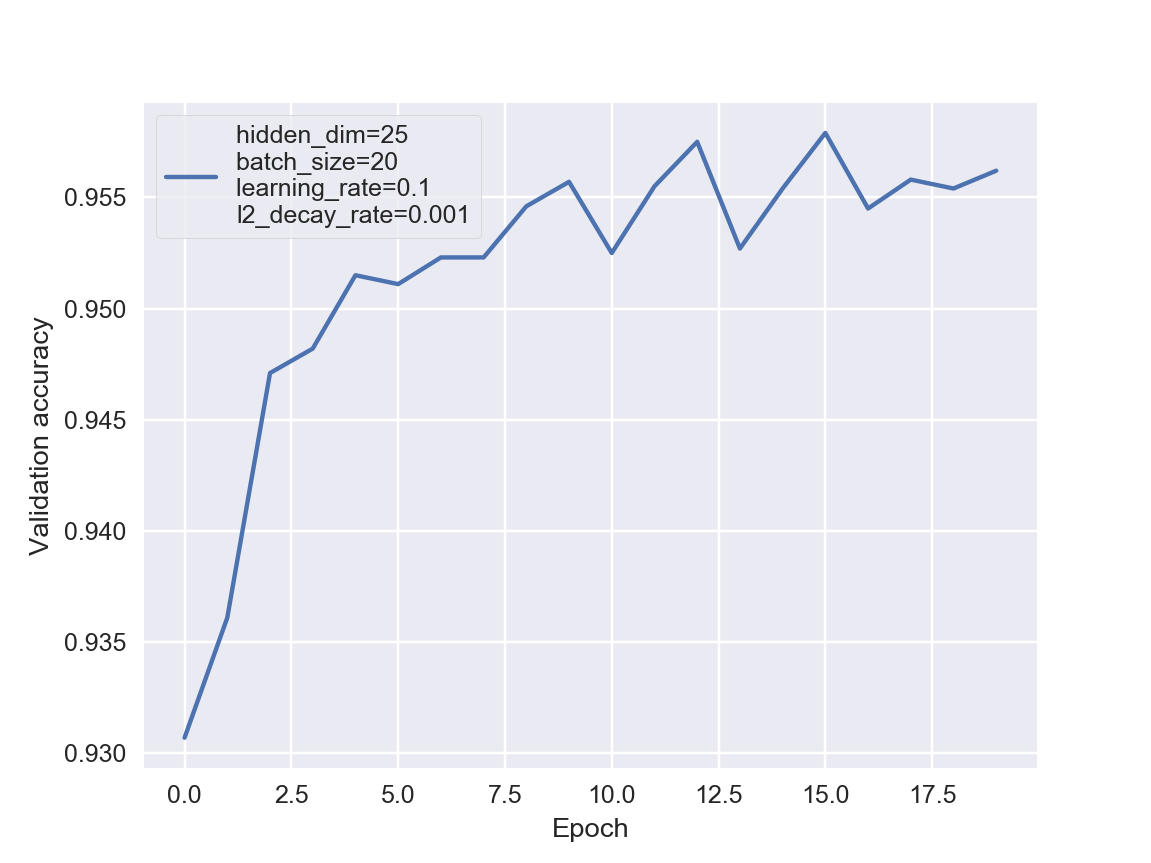

Test set accuracy: 0.957


In [141]:
# Load in data 
root = './data'
train_set = dset.MNIST(root=root, train=True, transform=transforms.ToTensor())
test_set = dset.MNIST(root=root, train=False, transform=transforms.ToTensor())

# Construct and train the classifier 
mlp = MLPClassifier(hidden_dim=25)
mlp.set_fit_params(batch_size=20, lr=0.1, l2_decay_rate=0.001, num_epochs=20)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

Next, we experiment with the following parameters. A total of 32 experiments are attached in the end of the solution.
- l2_decay_rate=0.001
- batch_size=[20, 50, 100, 200]
- hidden_dim=[25, 50, 75, 100]
- learning_rate=[0.1, 0.01]

We obtained the highest validation accuracy (~0.97) with l2_decay_rate=0.001, batch_size=20, hidden_dim=100, learning_rate=0.1. For this combination of parameters, the classification accuracy on the test set is **0.9694**. This is higher than the test set accuracy of the logistic regression classifier, which is 0.923.

A Jupyter Widget

<IPython.core.display.Javascript object>


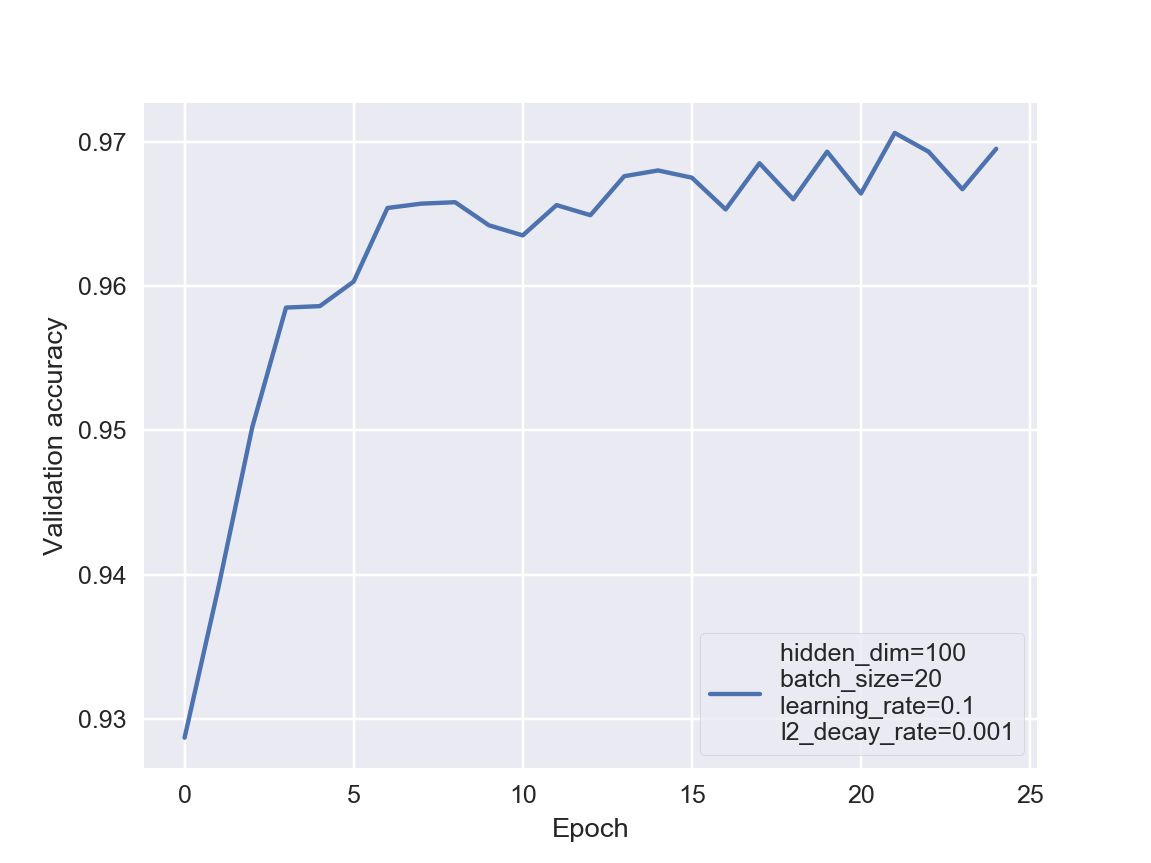

Test set accuracy: 0.9694


In [153]:
mlp = MLPClassifier(hidden_dim=100)
mlp.set_fit_params(batch_size=20, lr=0.1, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

Then, with the same batch_size, hidden_dim and learning_rate, we vary the l2_decay_rate from 0.001 to 0.0001. The validation set accuracy and test set accuracy are significantly improved. The test set accuracy is **0.9772**.

A Jupyter Widget

<IPython.core.display.Javascript object>


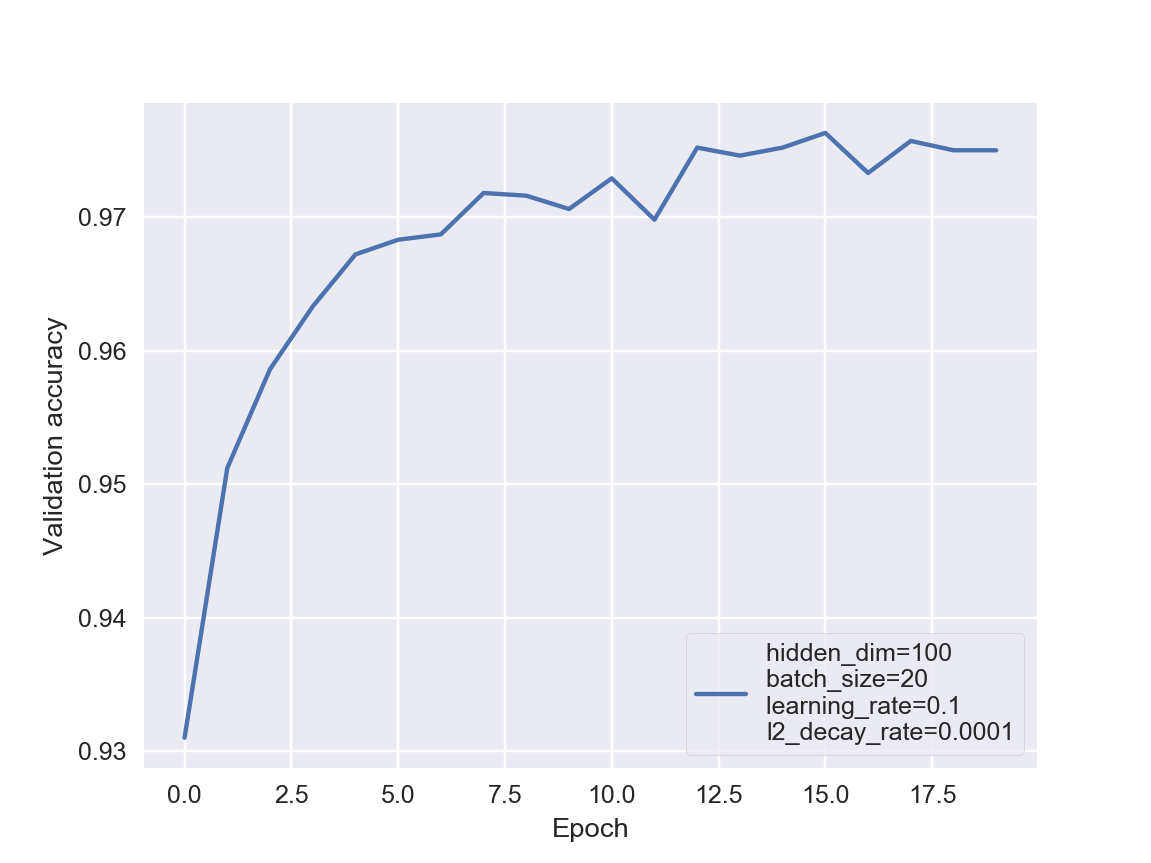

Test set accuracy: 0.9772


In [176]:
mlp = MLPClassifier(hidden_dim=100)
mlp.set_fit_params(batch_size=20, lr=0.1, l2_decay_rate=0.0001, num_epochs=20)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

### Experiments

A Jupyter Widget

<IPython.core.display.Javascript object>


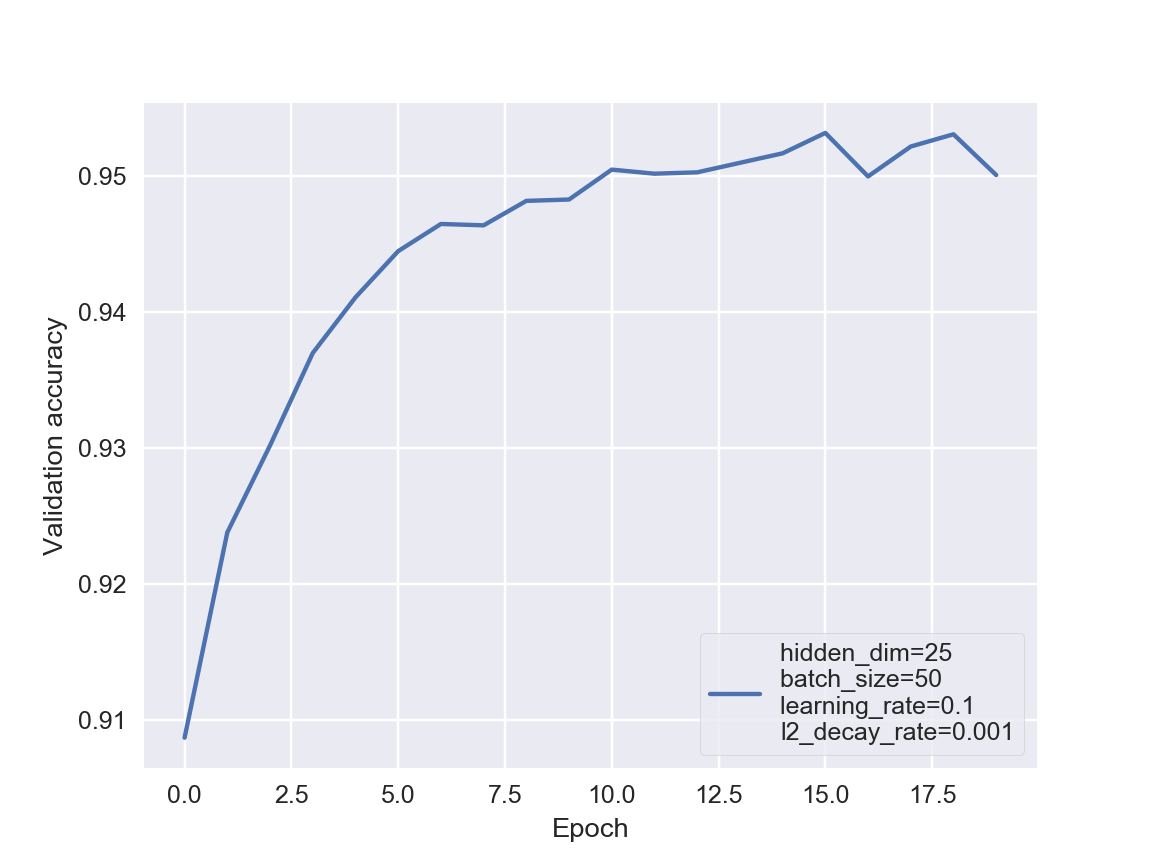

Test set accuracy: 0.9583


In [142]:
mlp = MLPClassifier(hidden_dim=25)
mlp.set_fit_params(batch_size=50, lr=0.1, l2_decay_rate=0.001, num_epochs=20)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


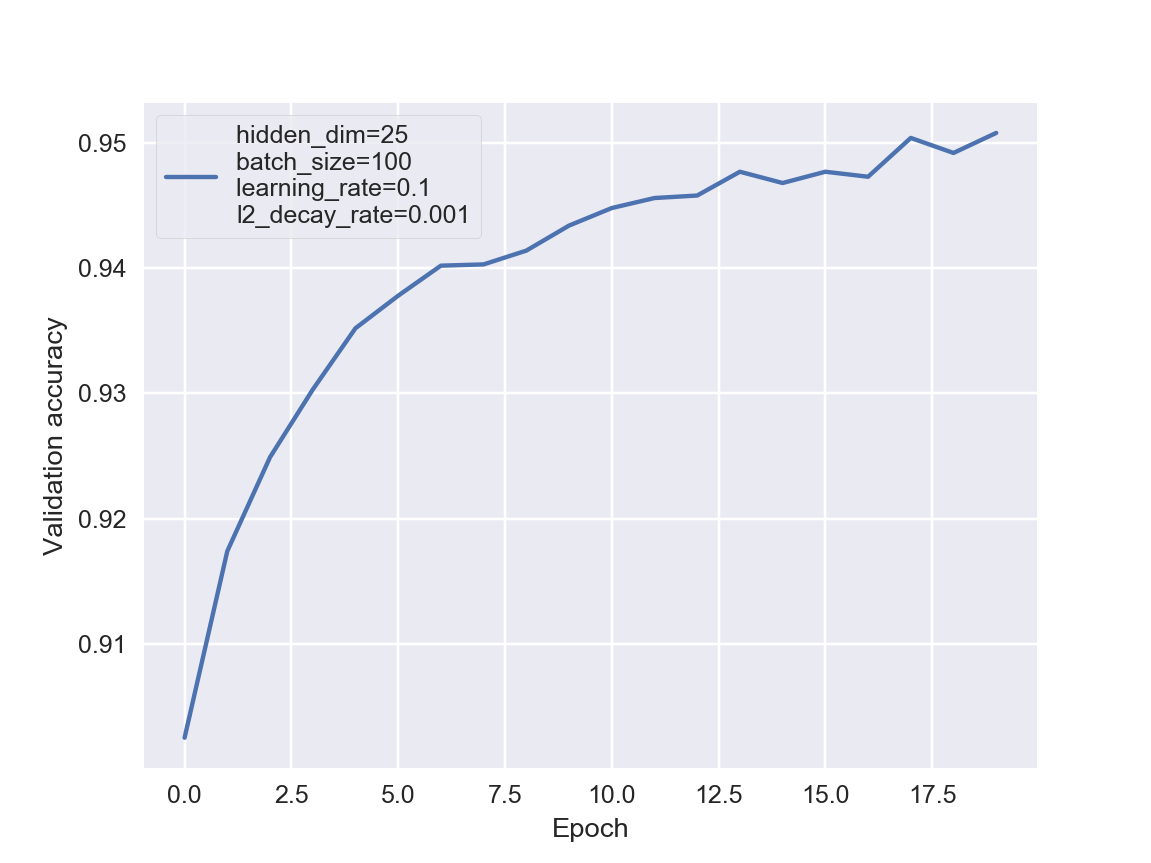

Test set accuracy: 0.9536


In [143]:
mlp = MLPClassifier(hidden_dim=25)
mlp.set_fit_params(batch_size=100, lr=0.1, l2_decay_rate=0.001, num_epochs=20)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


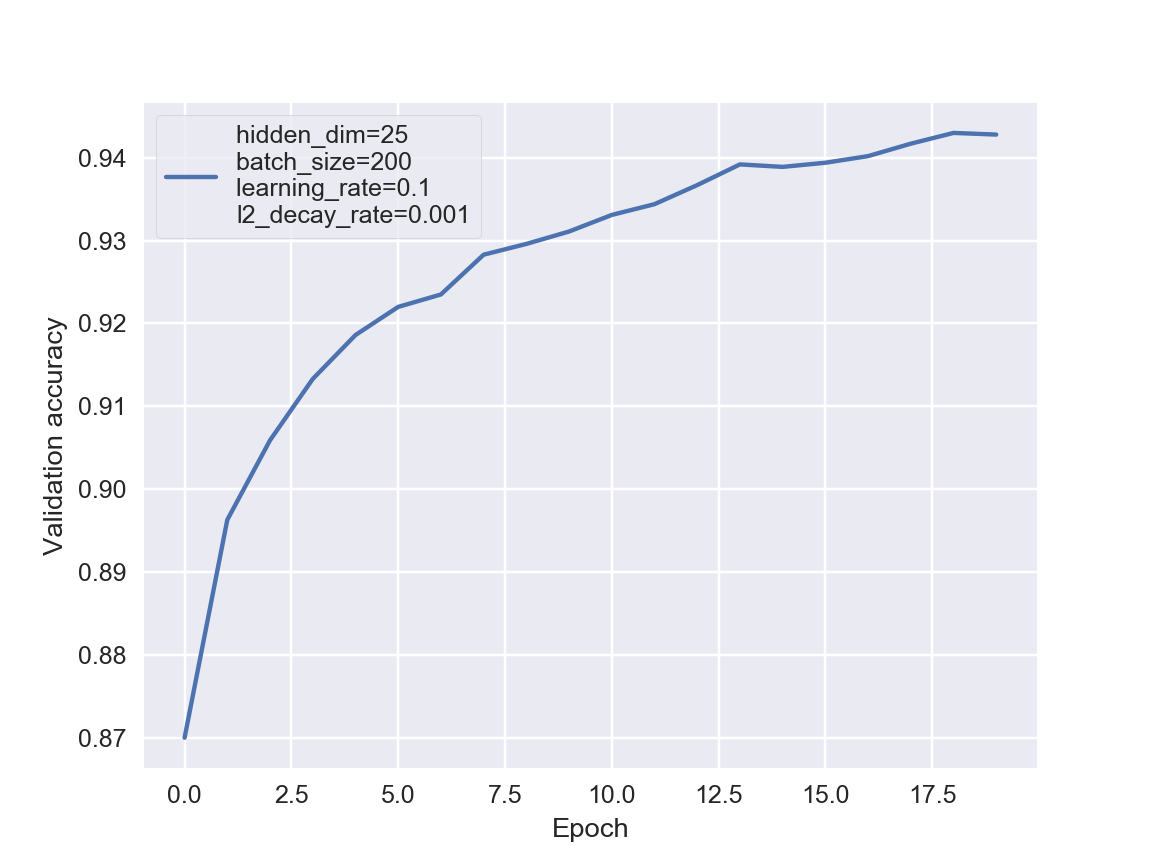

Test set accuracy: 0.9469


In [144]:
mlp = MLPClassifier(hidden_dim=25)
mlp.set_fit_params(batch_size=200, lr=0.1, l2_decay_rate=0.001, num_epochs=20)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


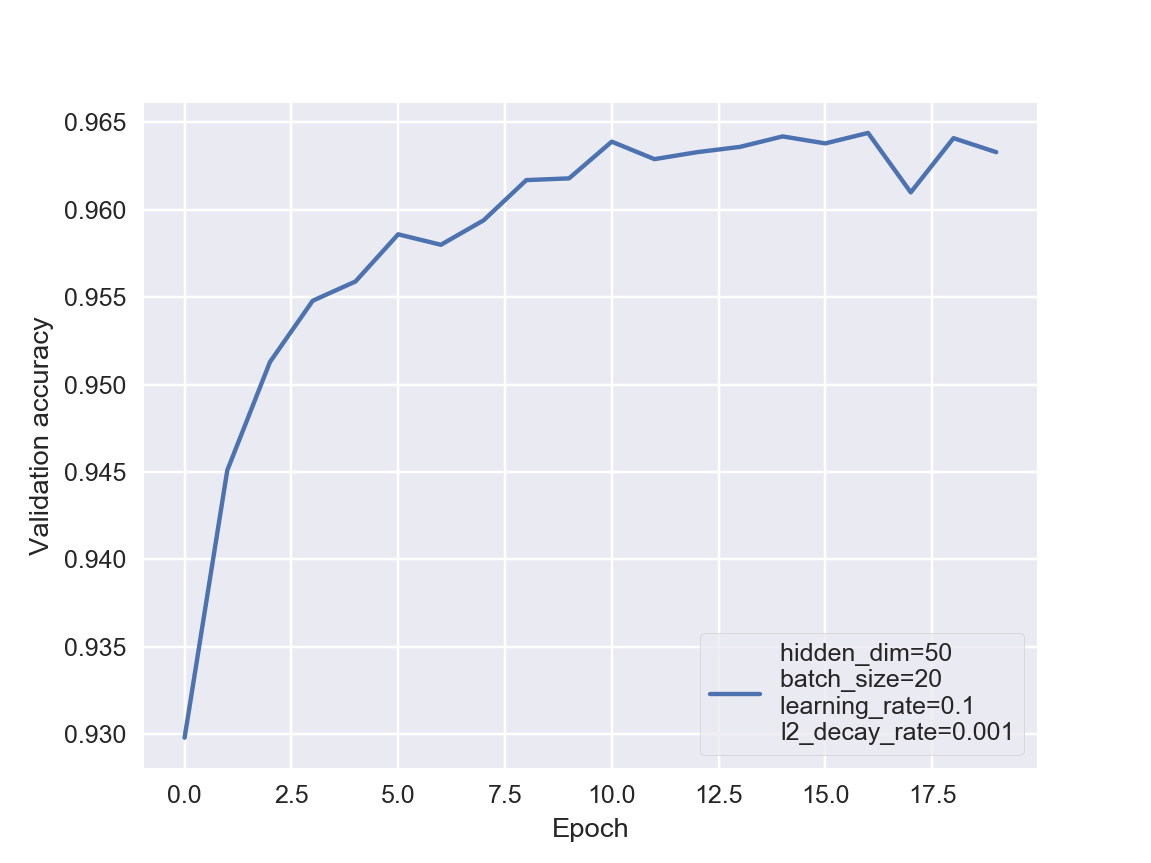

Test set accuracy: 0.9675


In [145]:
mlp = MLPClassifier(hidden_dim=50)
mlp.set_fit_params(batch_size=20, lr=0.1, l2_decay_rate=0.001, num_epochs=20)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


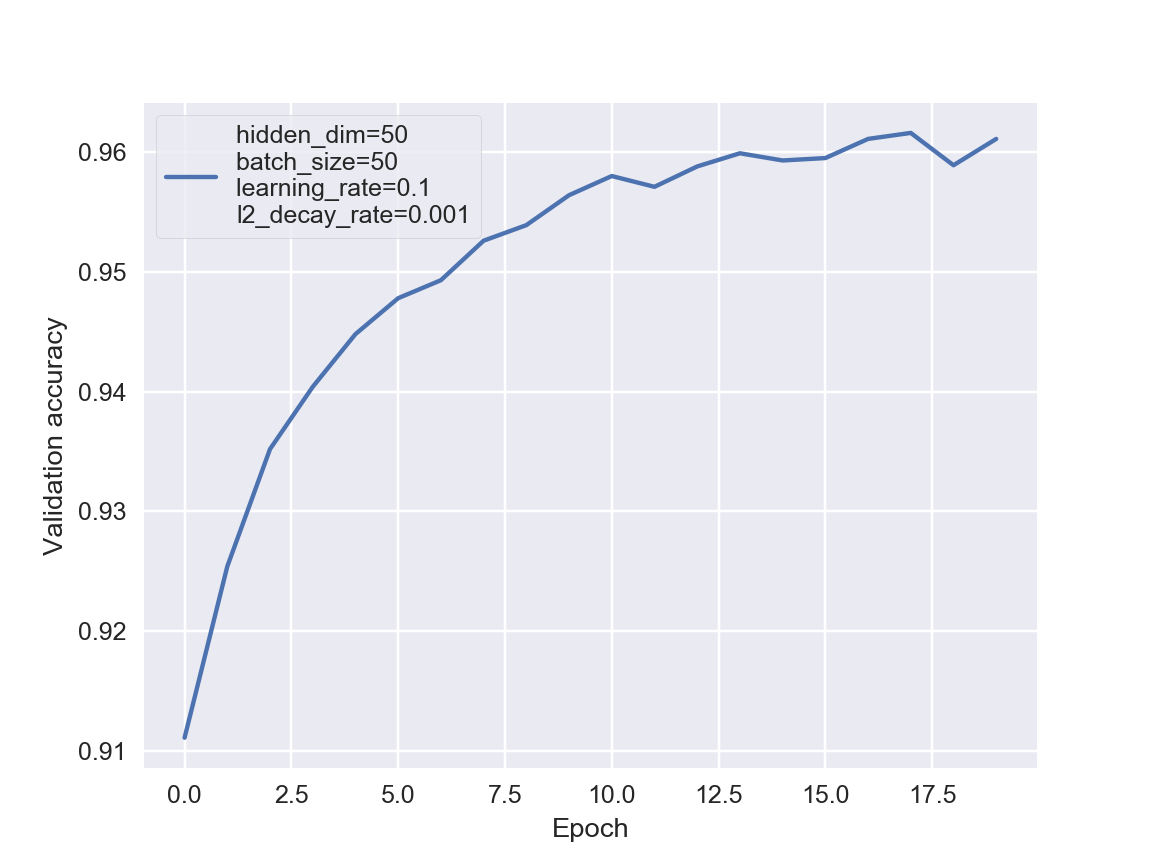

Test set accuracy: 0.9649


In [146]:
mlp = MLPClassifier(hidden_dim=50)
mlp.set_fit_params(batch_size=50, lr=0.1, l2_decay_rate=0.001, num_epochs=20)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


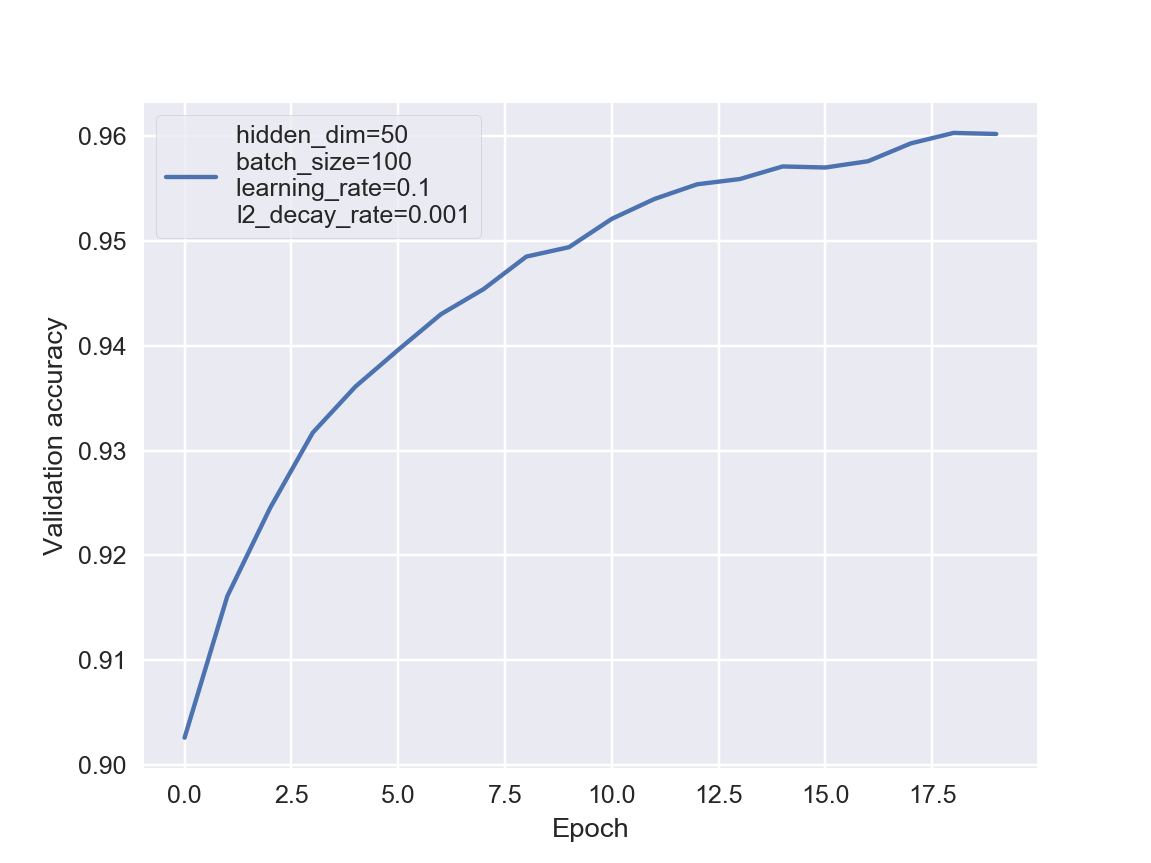

Test set accuracy: 0.9593


In [147]:
mlp = MLPClassifier(hidden_dim=50)
mlp.set_fit_params(batch_size=100, lr=0.1, l2_decay_rate=0.001, num_epochs=20)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


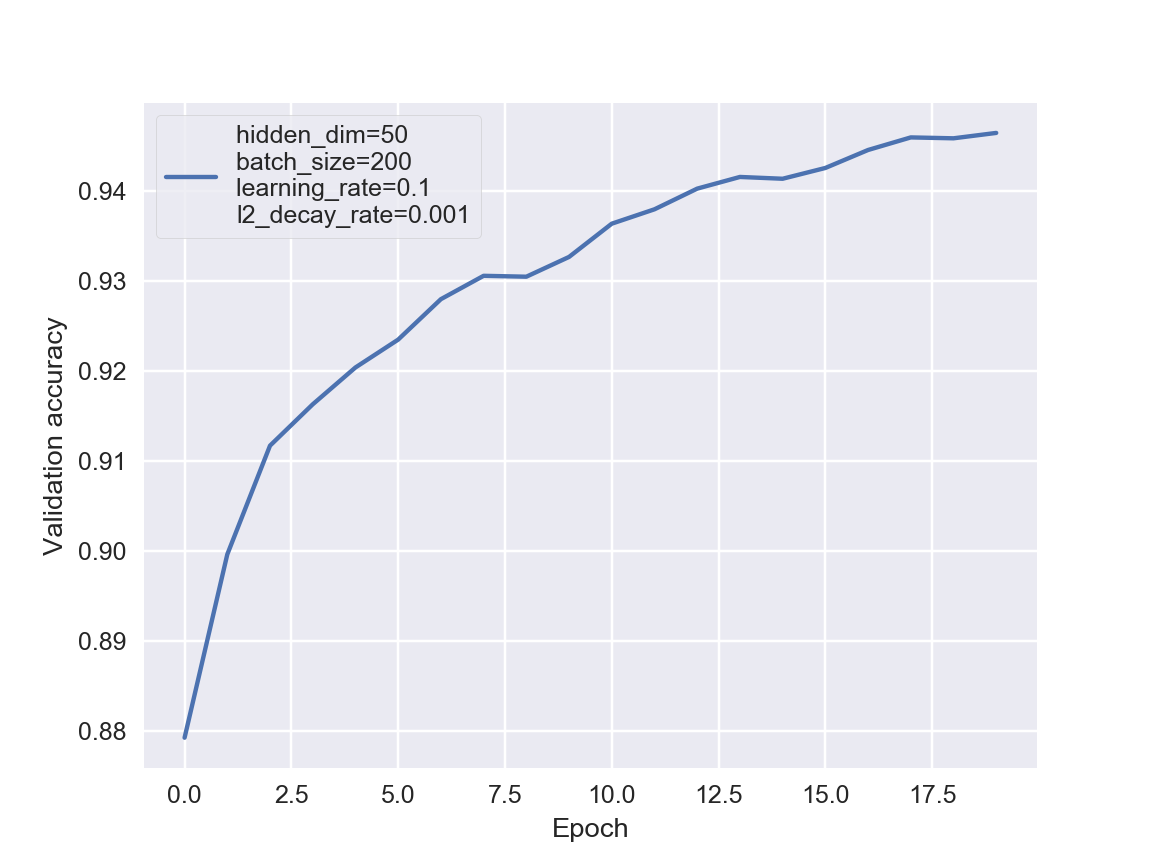

Test set accuracy: 0.9504


In [148]:
mlp = MLPClassifier(hidden_dim=50)
mlp.set_fit_params(batch_size=200, lr=0.1, l2_decay_rate=0.001, num_epochs=20)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


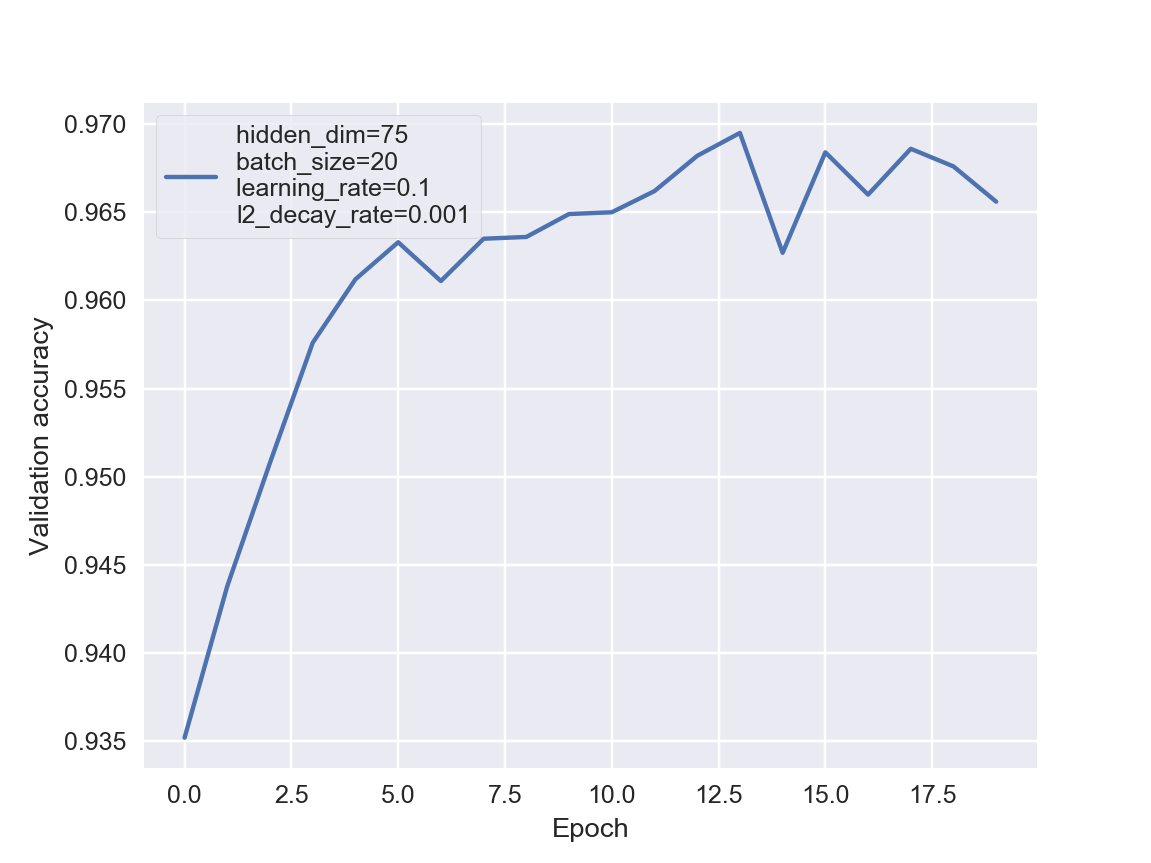

Test set accuracy: 0.9689


In [149]:
mlp = MLPClassifier(hidden_dim=75)
mlp.set_fit_params(batch_size=20, lr=0.1, l2_decay_rate=0.001, num_epochs=20)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


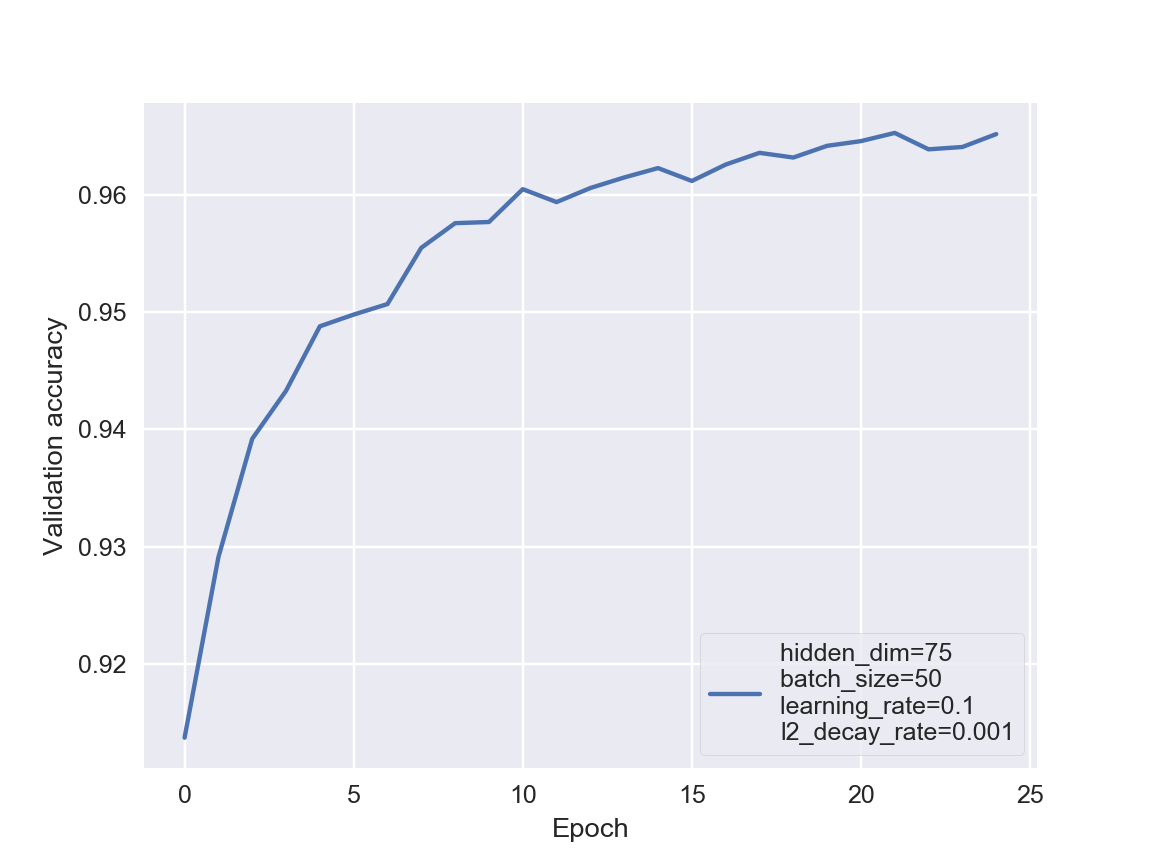

Test set accuracy: 0.9707


In [150]:
mlp = MLPClassifier(hidden_dim=75)
mlp.set_fit_params(batch_size=50, lr=0.1, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


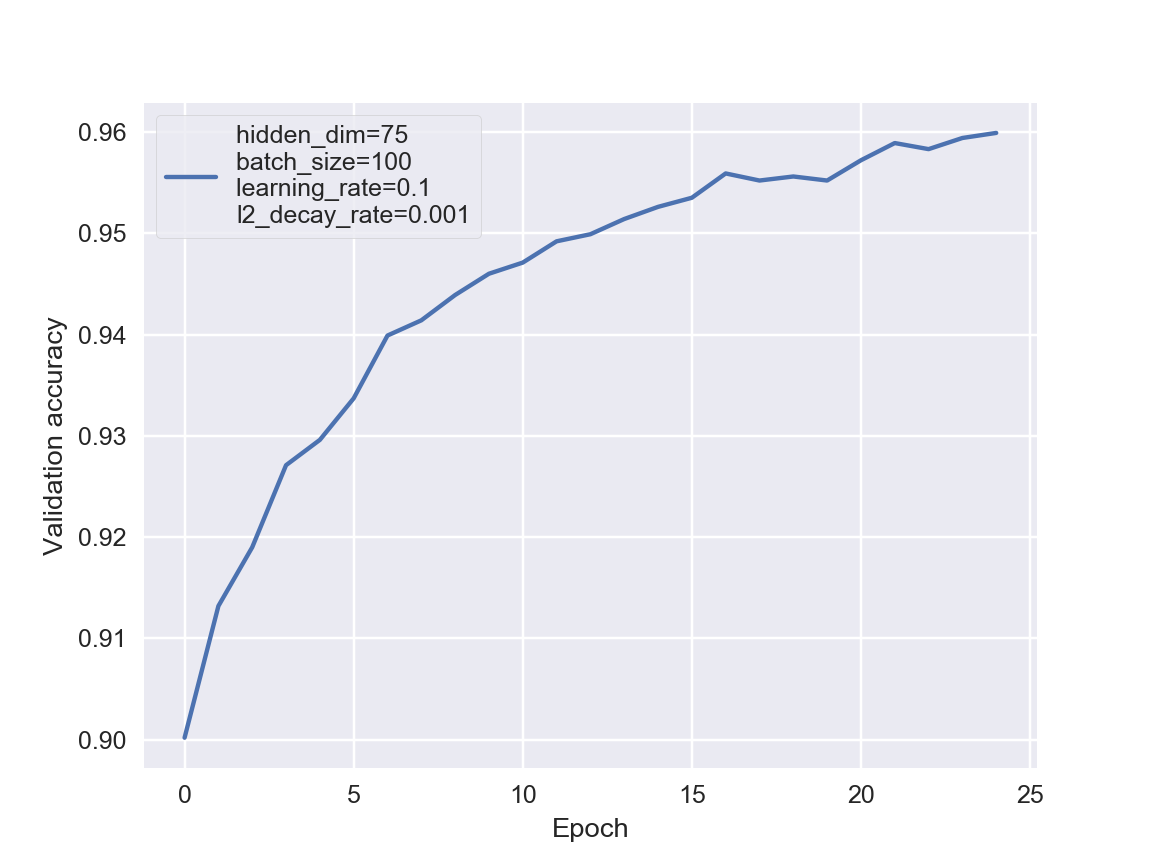

Test set accuracy: 0.9647


In [151]:
mlp = MLPClassifier(hidden_dim=75)
mlp.set_fit_params(batch_size=100, lr=0.1, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


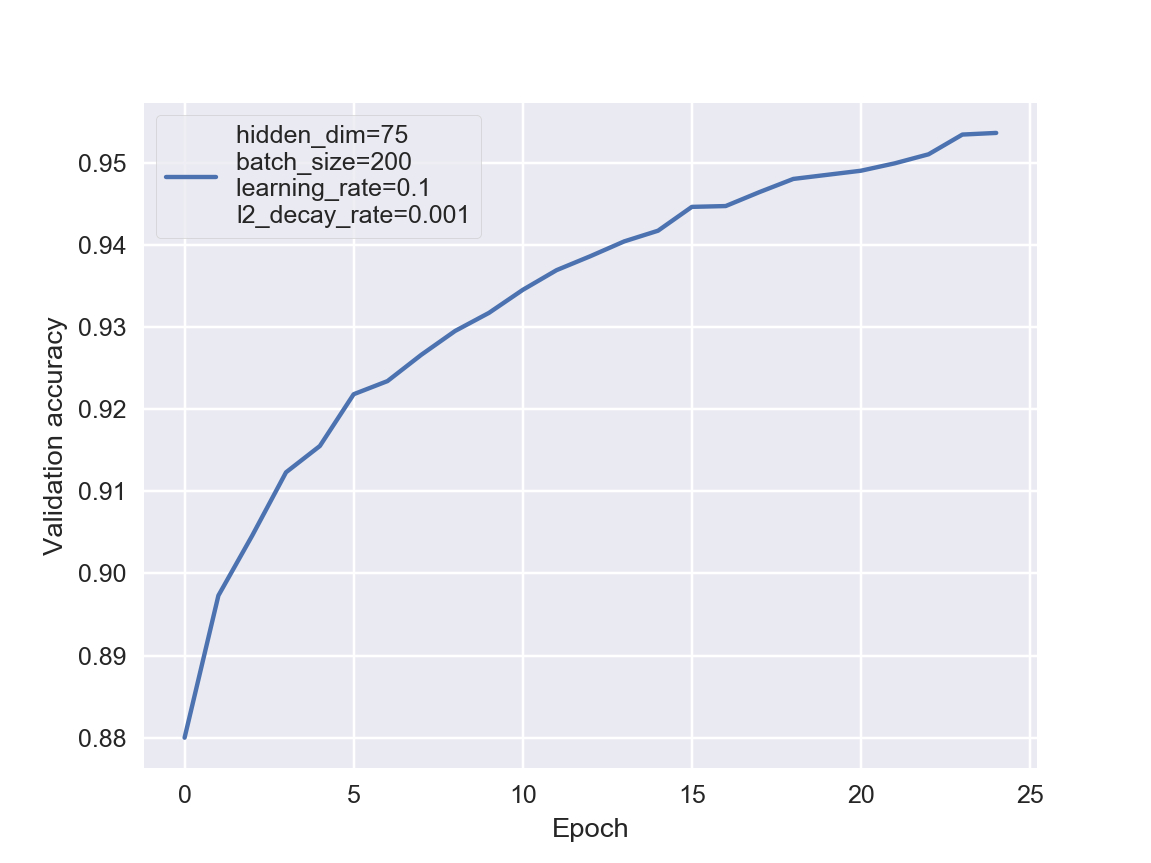

Test set accuracy: 0.9563


In [152]:
mlp = MLPClassifier(hidden_dim=75)
mlp.set_fit_params(batch_size=200, lr=0.1, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


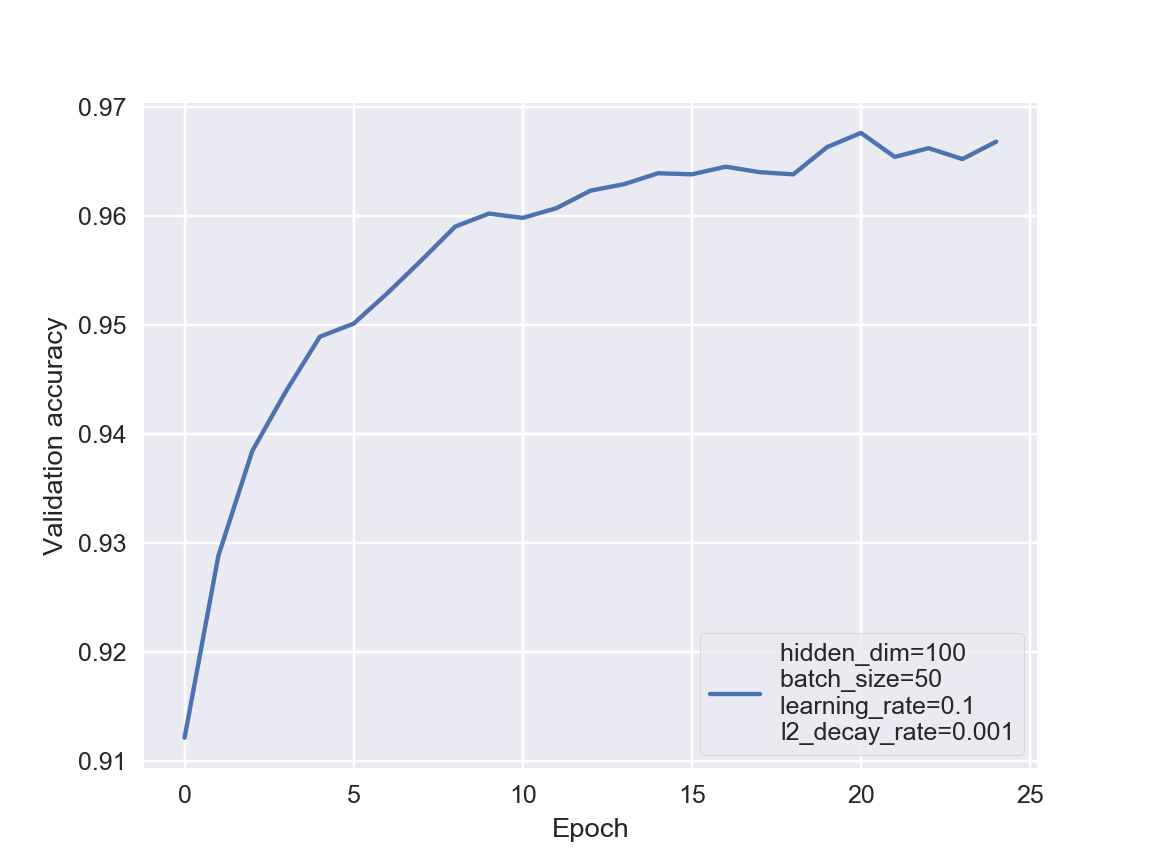

Test set accuracy: 0.9695


In [154]:
mlp = MLPClassifier(hidden_dim=100)
mlp.set_fit_params(batch_size=50, lr=0.1, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


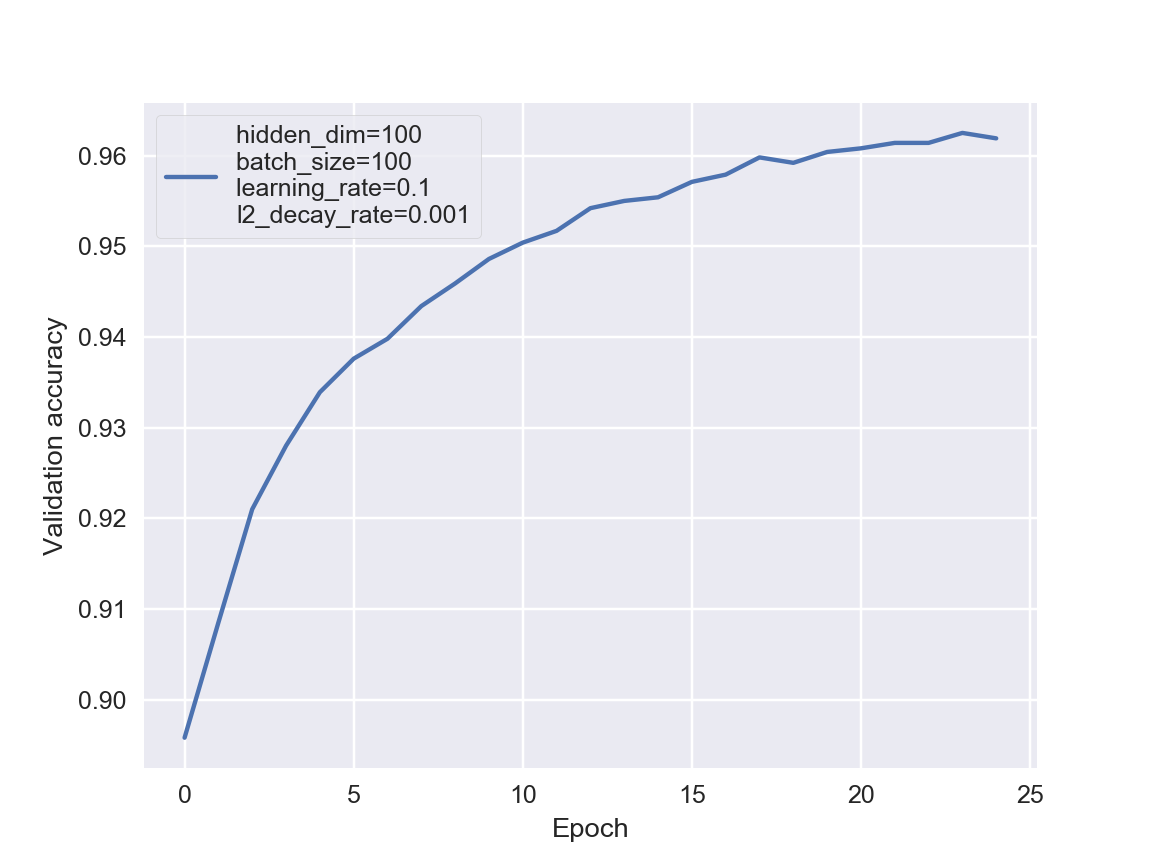

Test set accuracy: 0.9651


In [155]:
mlp = MLPClassifier(hidden_dim=100)
mlp.set_fit_params(batch_size=100, lr=0.1, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


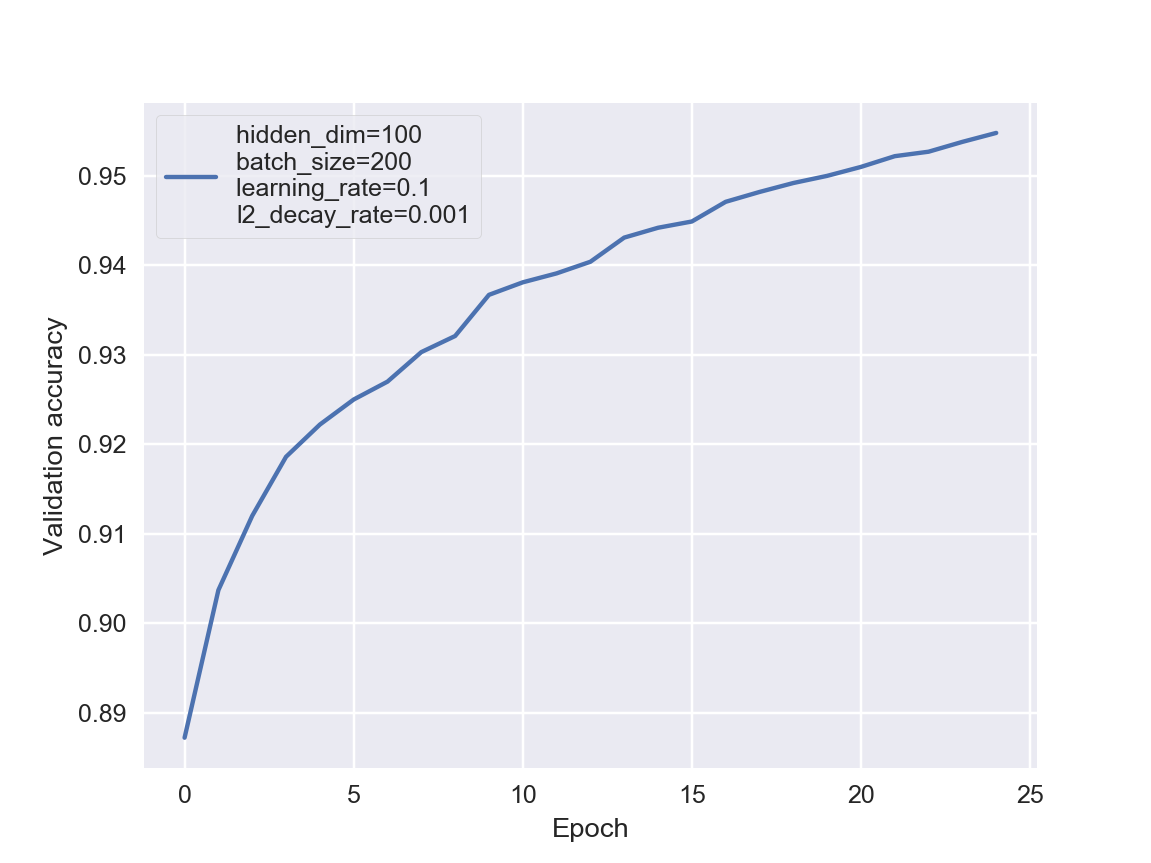

Test set accuracy: 0.9538


In [156]:
mlp = MLPClassifier(hidden_dim=100)
mlp.set_fit_params(batch_size=200, lr=0.1, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


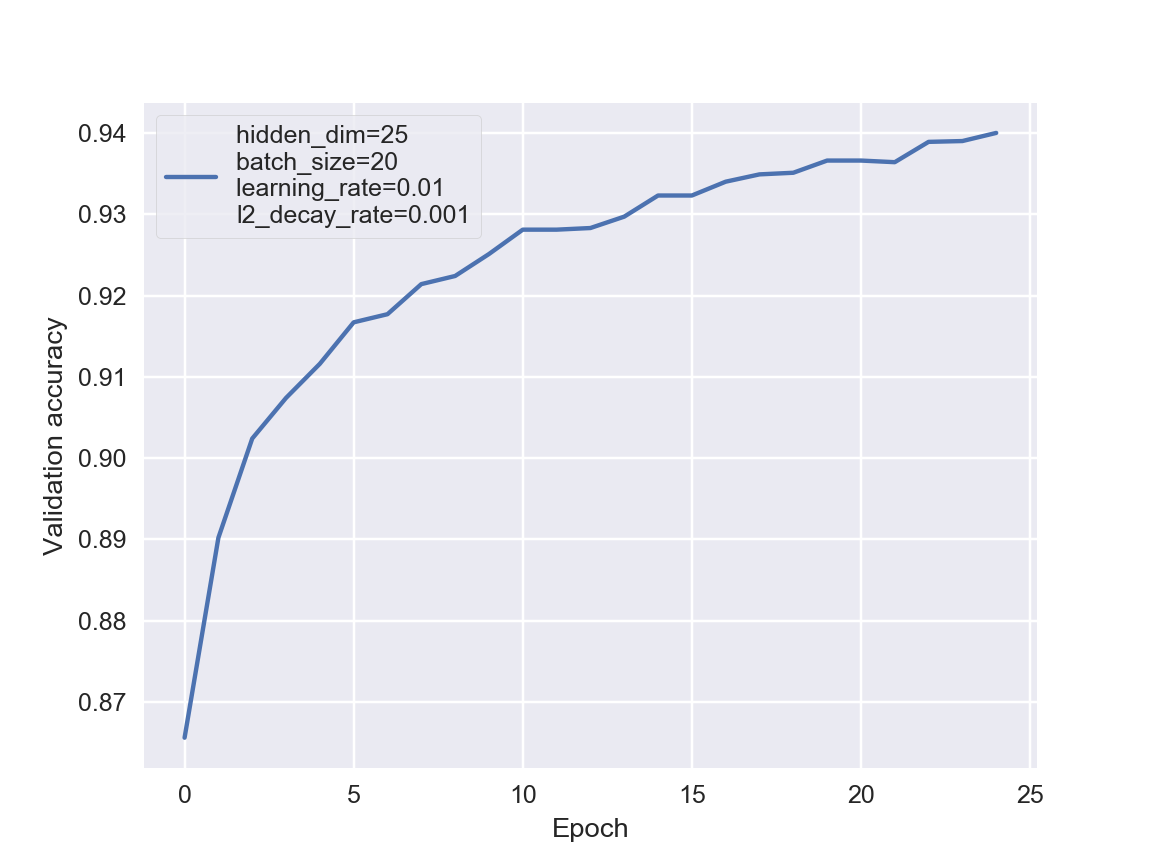

Test set accuracy: 0.9486


In [157]:
mlp = MLPClassifier(hidden_dim=25)
mlp.set_fit_params(batch_size=20, lr=0.01, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


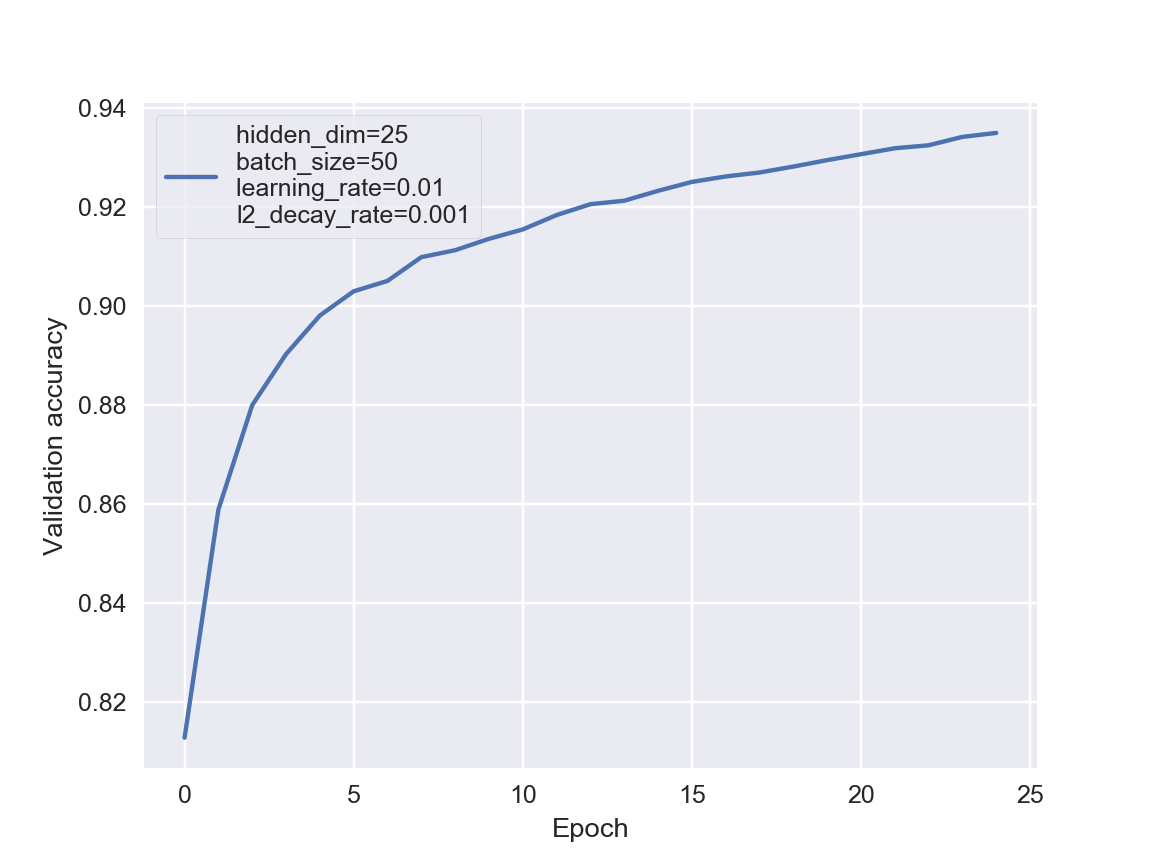

Test set accuracy: 0.9353


In [158]:
mlp = MLPClassifier(hidden_dim=25)
mlp.set_fit_params(batch_size=50, lr=0.01, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


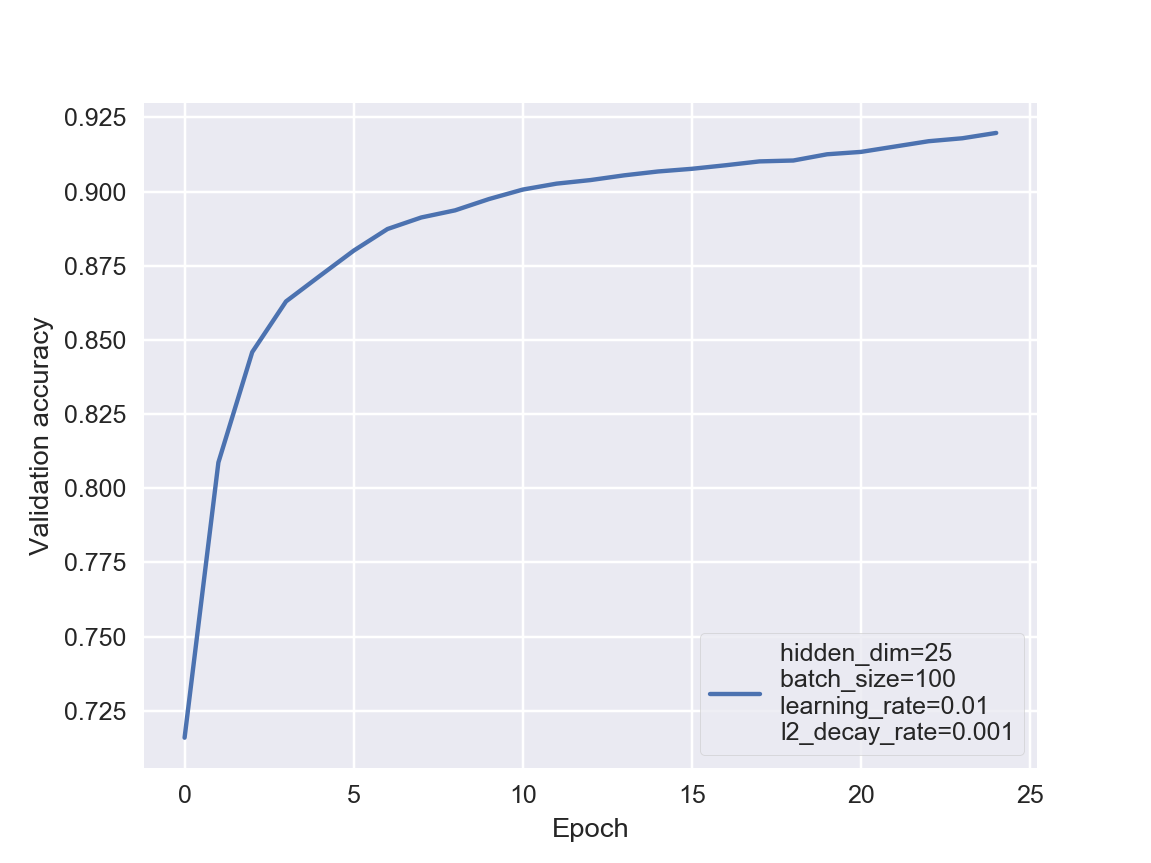

Test set accuracy: 0.9253


In [159]:
mlp = MLPClassifier(hidden_dim=25)
mlp.set_fit_params(batch_size=100, lr=0.01, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


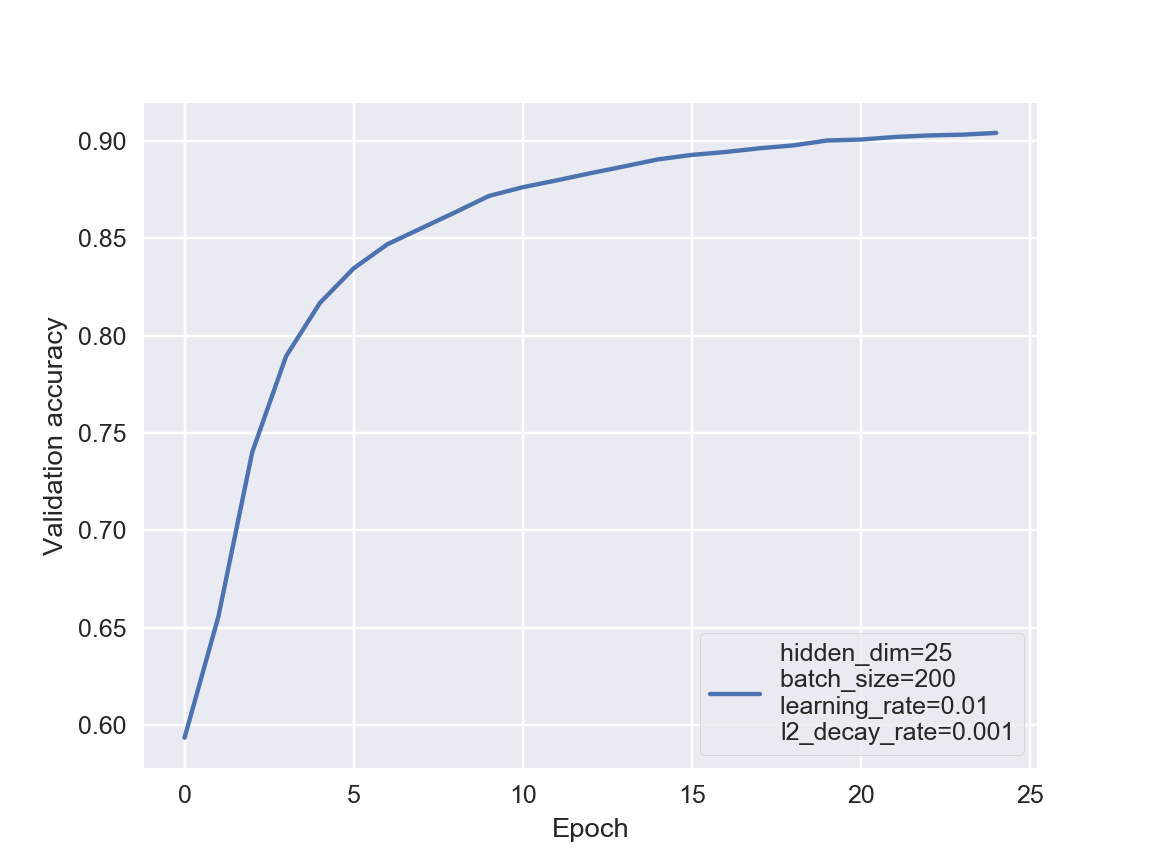

Test set accuracy: 0.9111


In [160]:
mlp = MLPClassifier(hidden_dim=25)
mlp.set_fit_params(batch_size=200, lr=0.01, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


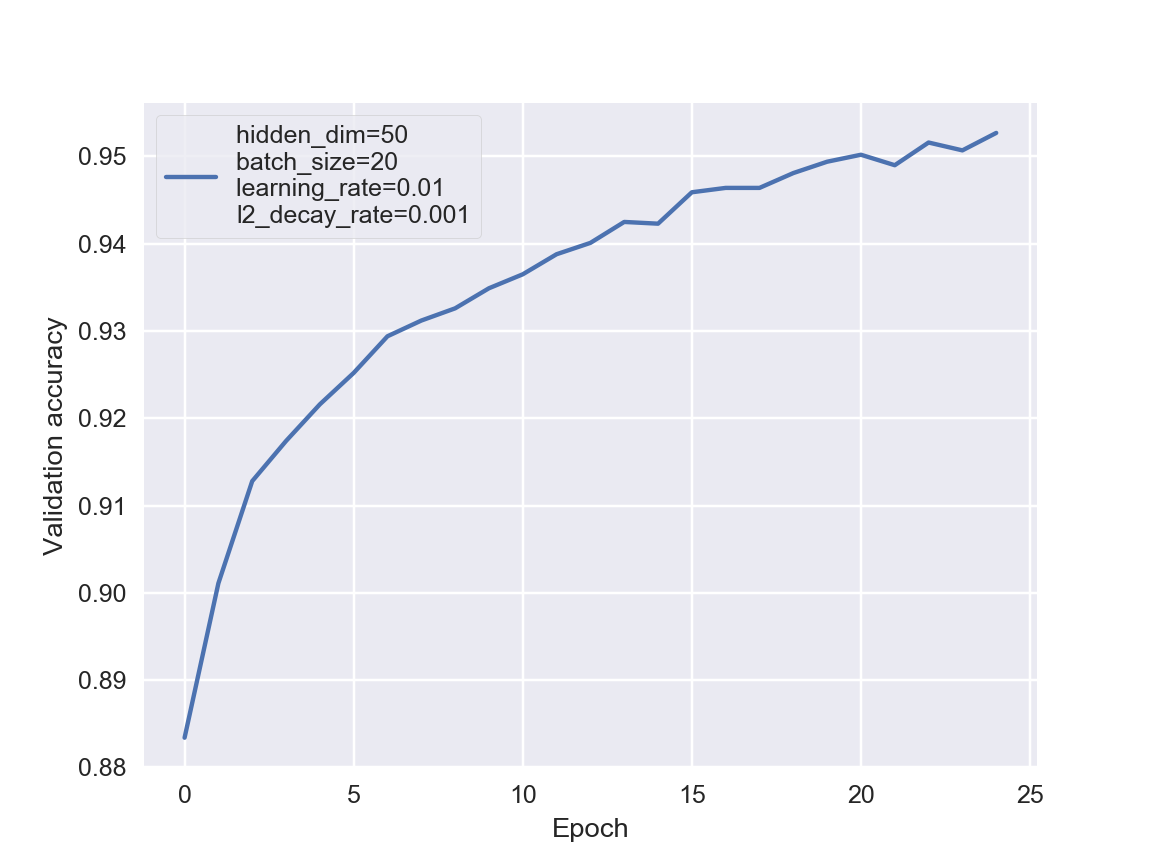

Test set accuracy: 0.9522


In [161]:
mlp = MLPClassifier(hidden_dim=50)
mlp.set_fit_params(batch_size=20, lr=0.01, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


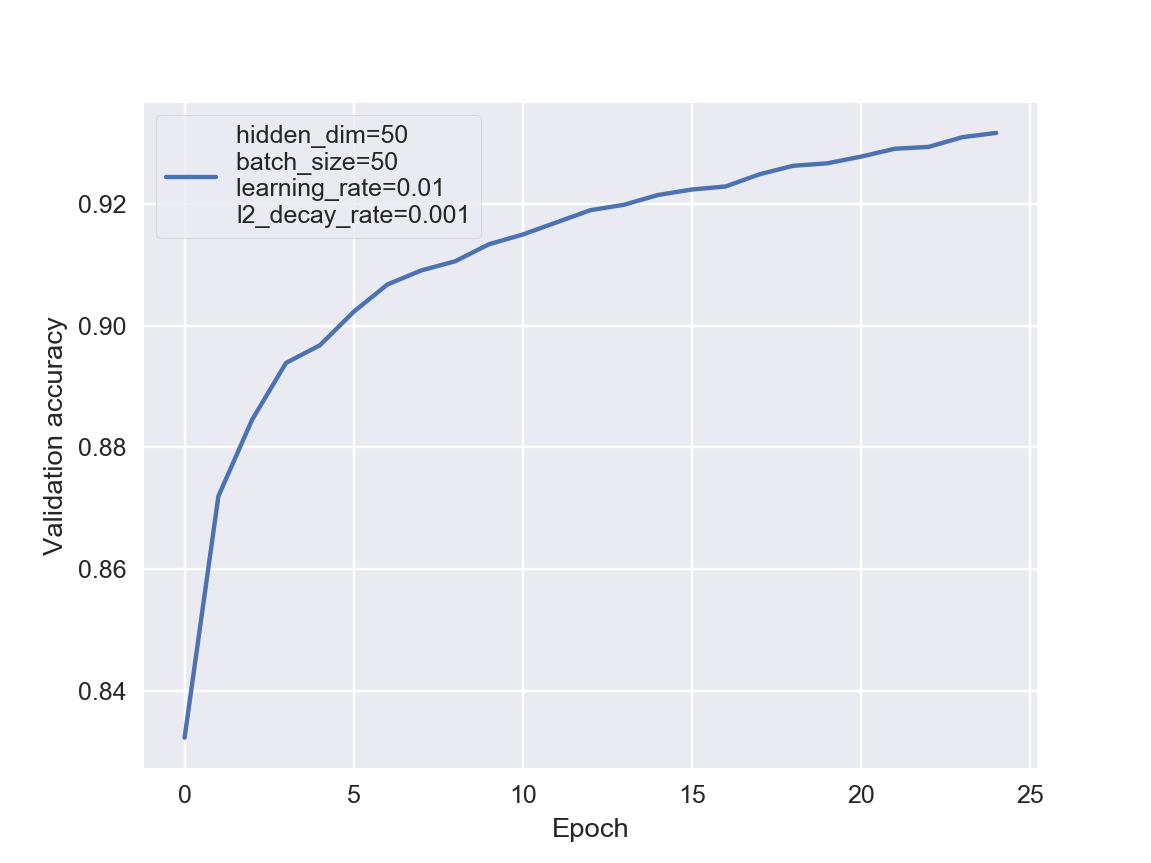

Test set accuracy: 0.9407


In [162]:
mlp = MLPClassifier(hidden_dim=50)
mlp.set_fit_params(batch_size=50, lr=0.01, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


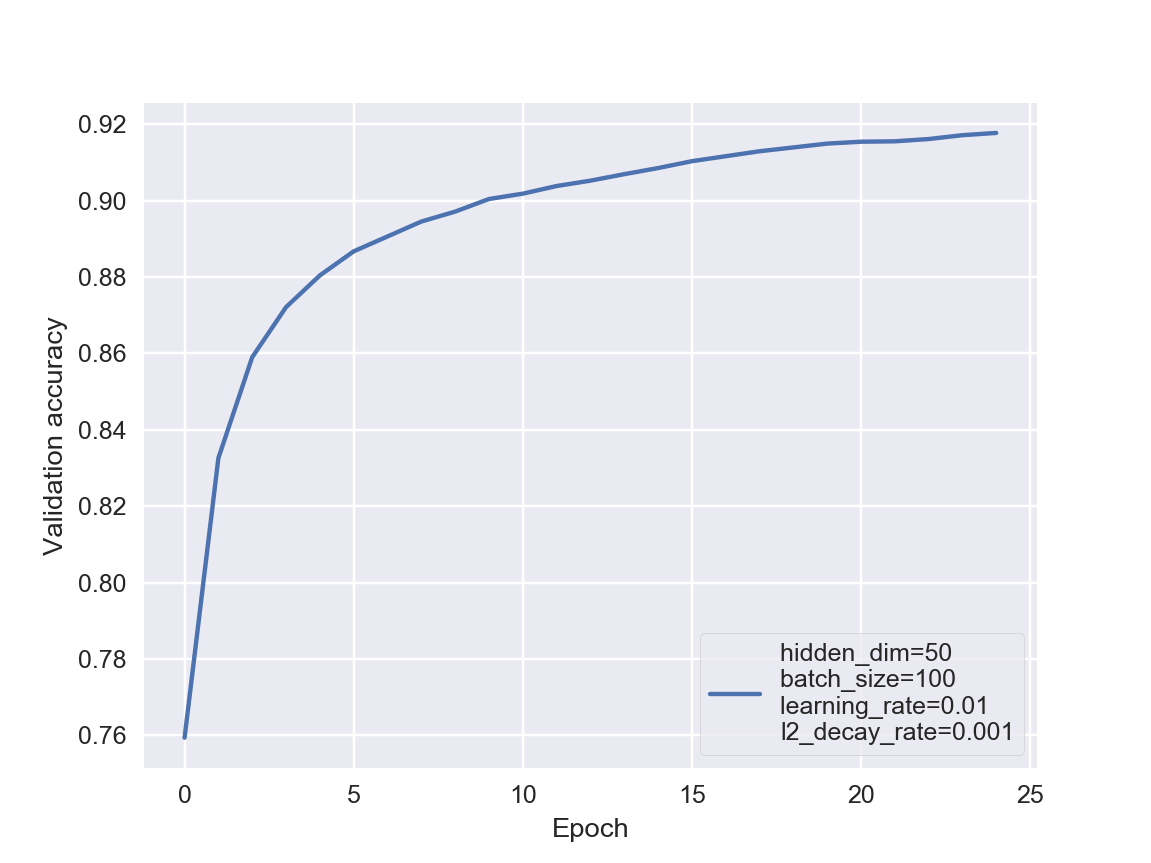

Test set accuracy: 0.9238


In [163]:
mlp = MLPClassifier(hidden_dim=50)
mlp.set_fit_params(batch_size=100, lr=0.01, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


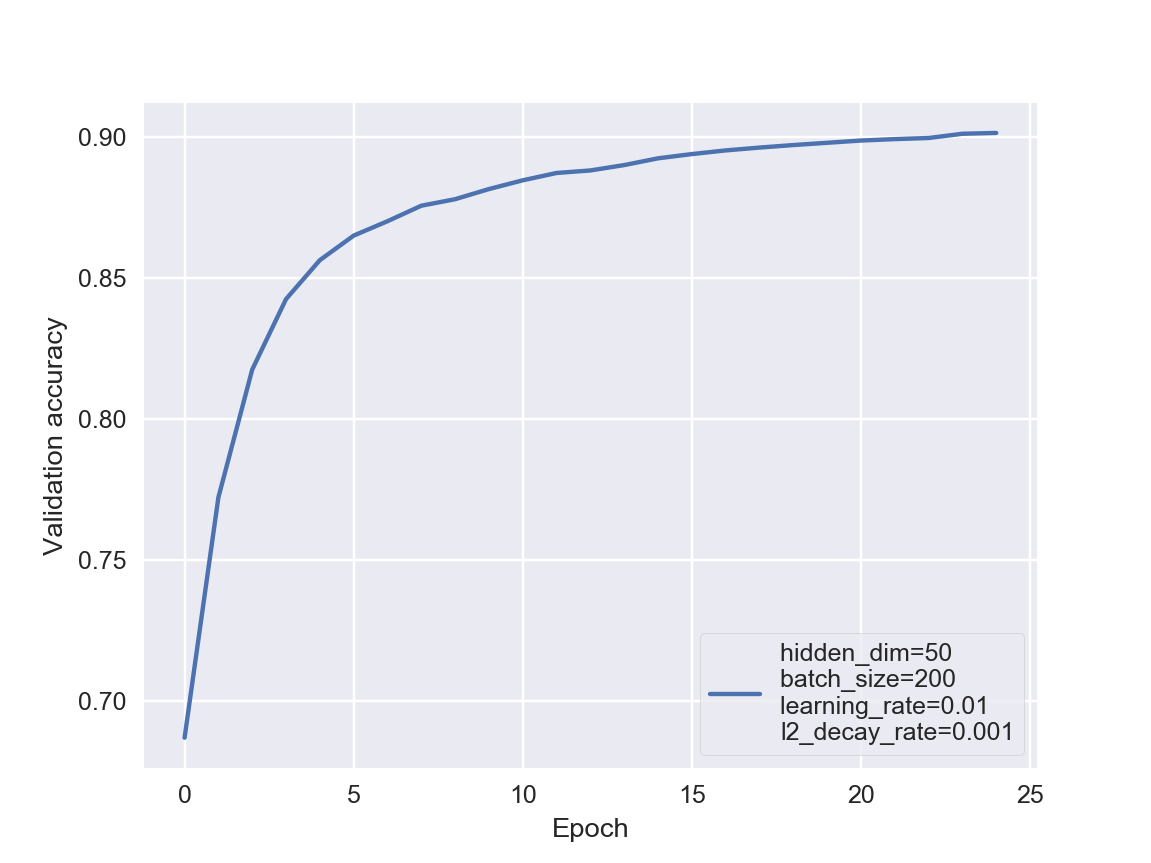

Test set accuracy: 0.9116


In [164]:
mlp = MLPClassifier(hidden_dim=50)
mlp.set_fit_params(batch_size=200, lr=0.01, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


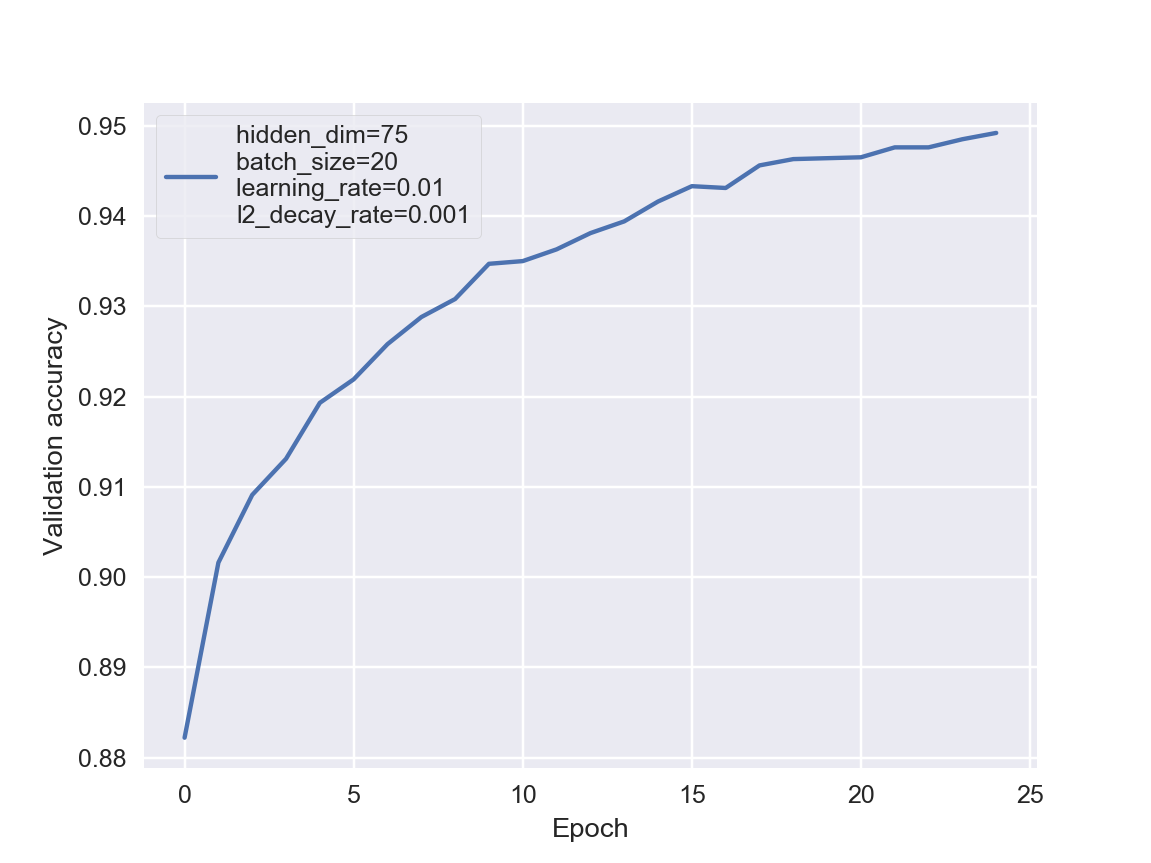

Test set accuracy: 0.9567


In [165]:
mlp = MLPClassifier(hidden_dim=75)
mlp.set_fit_params(batch_size=20, lr=0.01, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


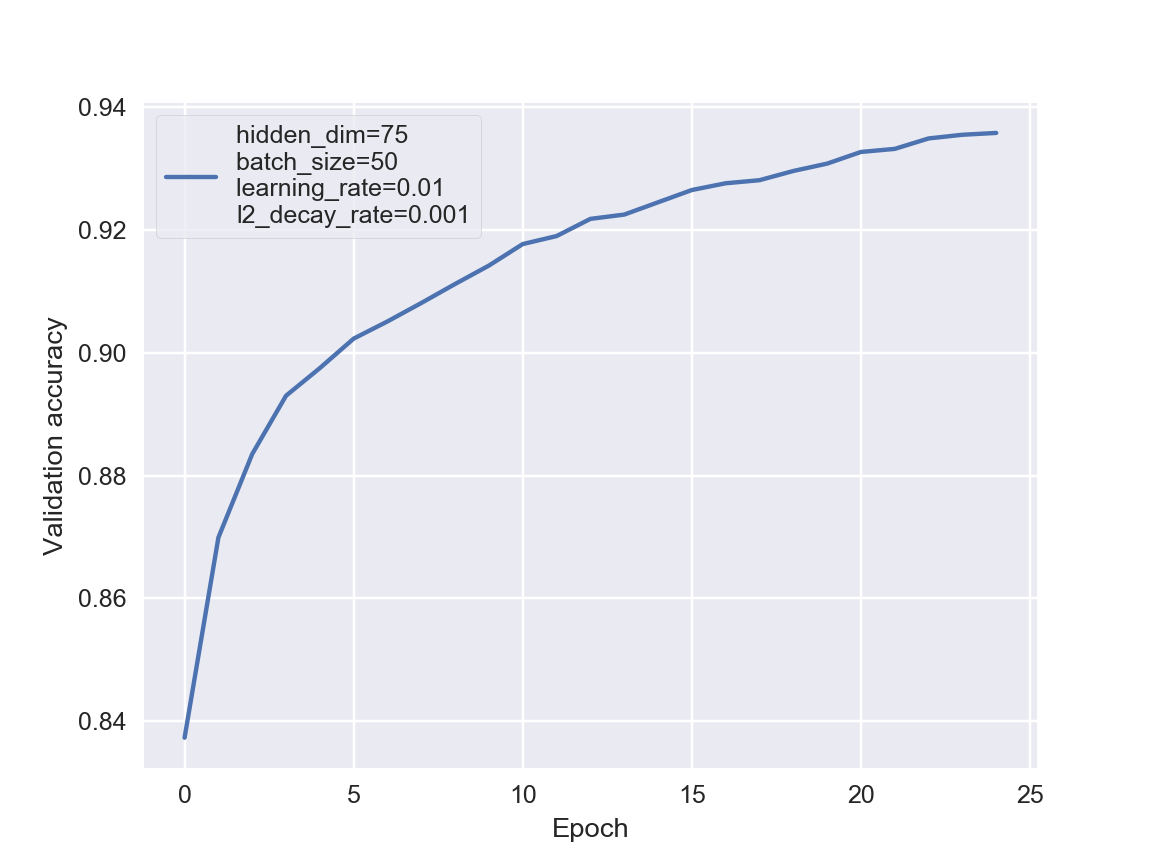

Test set accuracy: 0.9393


In [166]:
mlp = MLPClassifier(hidden_dim=75)
mlp.set_fit_params(batch_size=50, lr=0.01, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


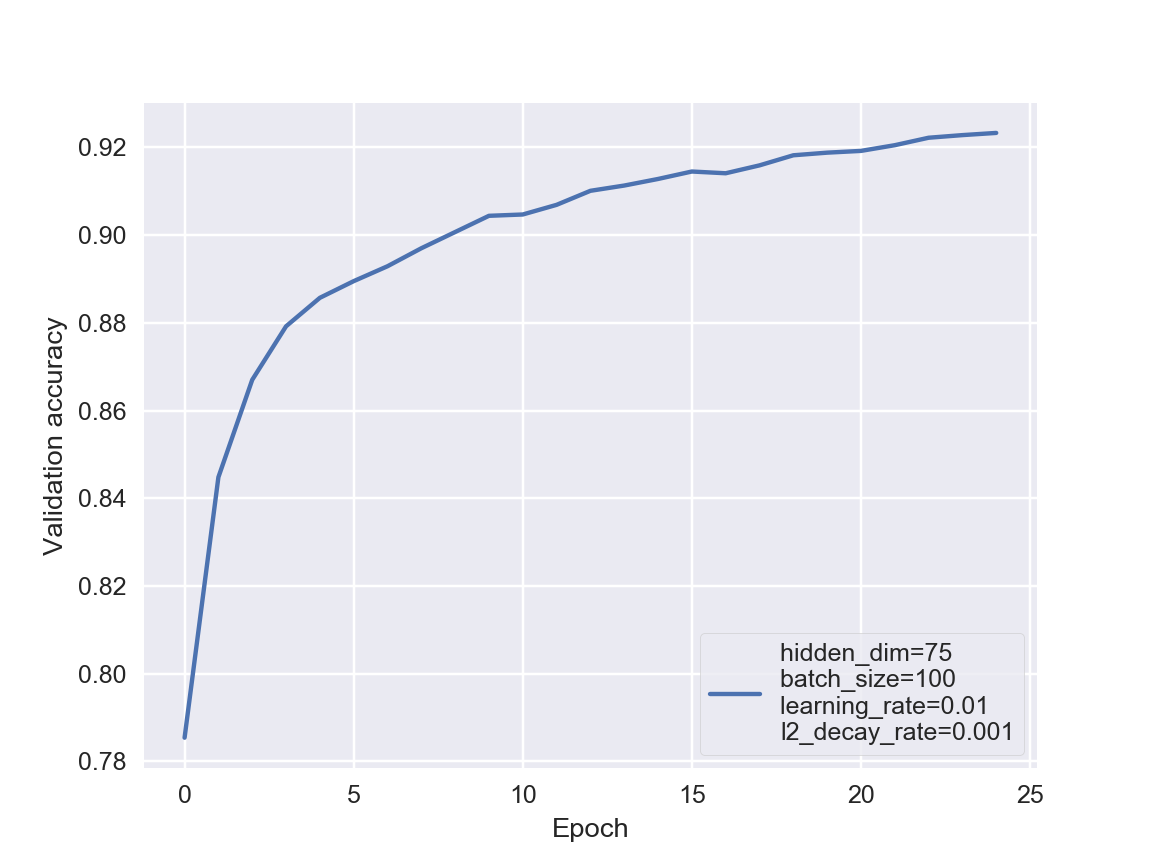

Test set accuracy: 0.9258


In [167]:
mlp = MLPClassifier(hidden_dim=75)
mlp.set_fit_params(batch_size=100, lr=0.01, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


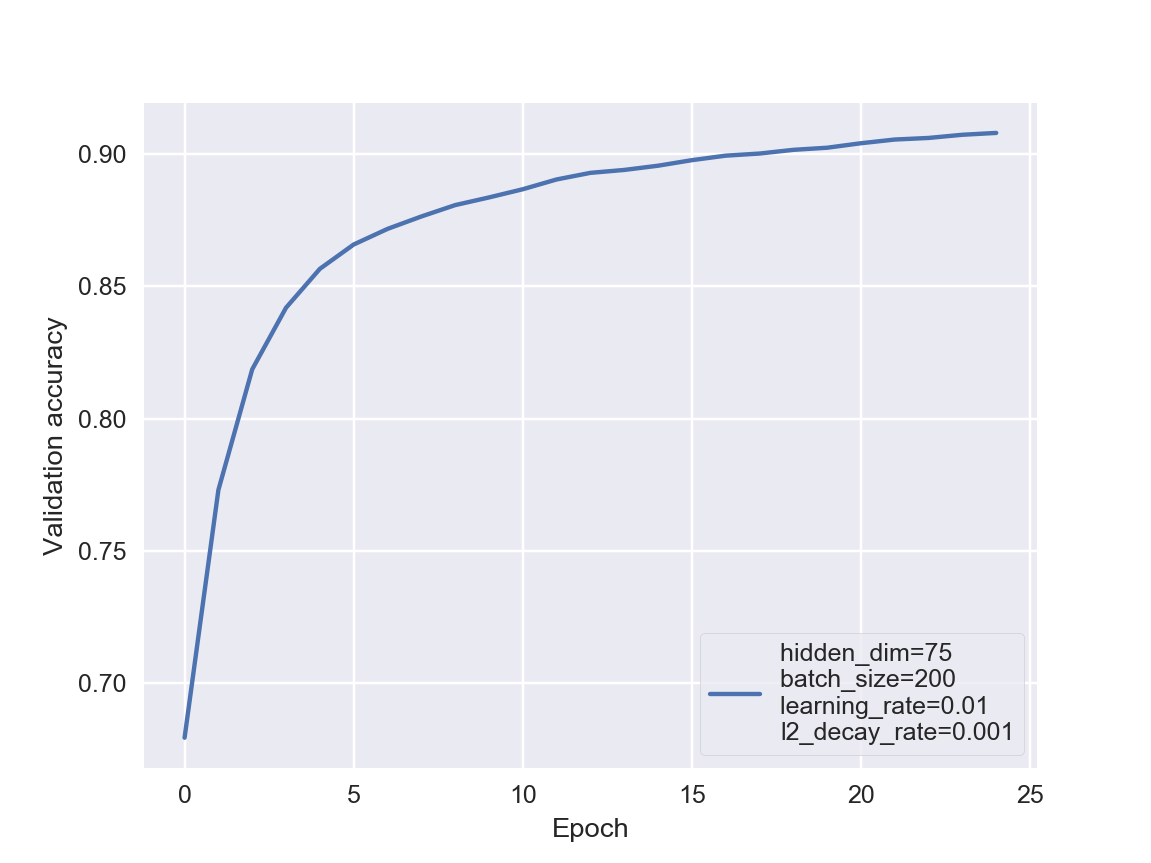

Test set accuracy: 0.9127


In [168]:
mlp = MLPClassifier(hidden_dim=75)
mlp.set_fit_params(batch_size=200, lr=0.01, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


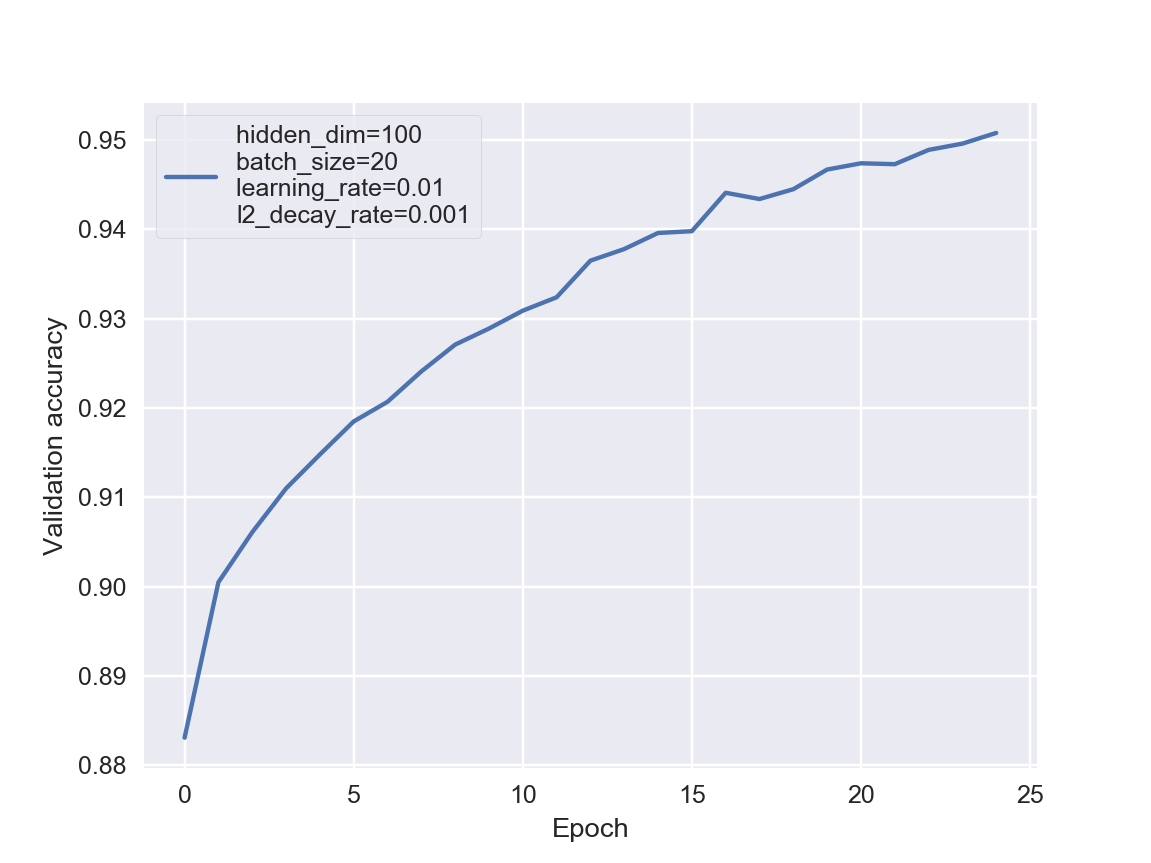

Test set accuracy: 0.9567


In [169]:
mlp = MLPClassifier(hidden_dim=100)
mlp.set_fit_params(batch_size=20, lr=0.01, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


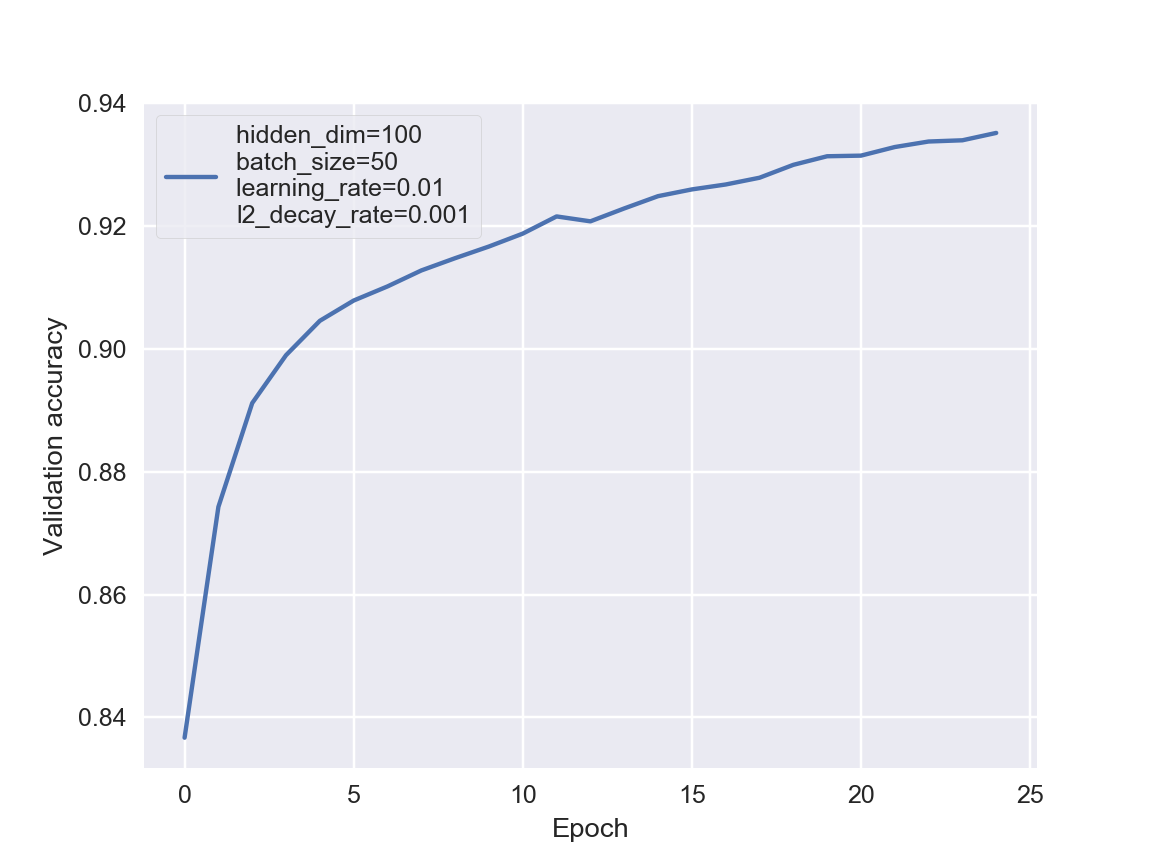

Test set accuracy: 0.9382


In [170]:
mlp = MLPClassifier(hidden_dim=100)
mlp.set_fit_params(batch_size=50, lr=0.01, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


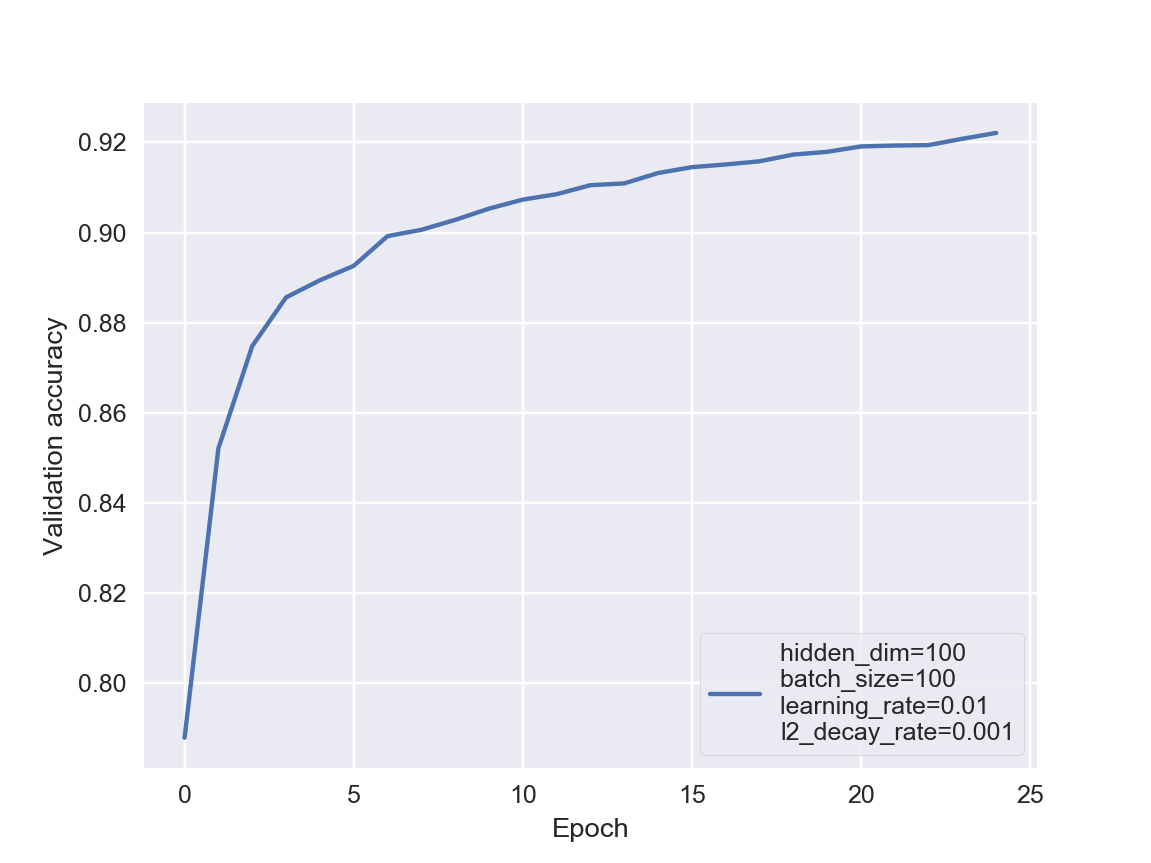

Test set accuracy: 0.9254


In [171]:
mlp = MLPClassifier(hidden_dim=100)
mlp.set_fit_params(batch_size=100, lr=0.01, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

A Jupyter Widget

<IPython.core.display.Javascript object>


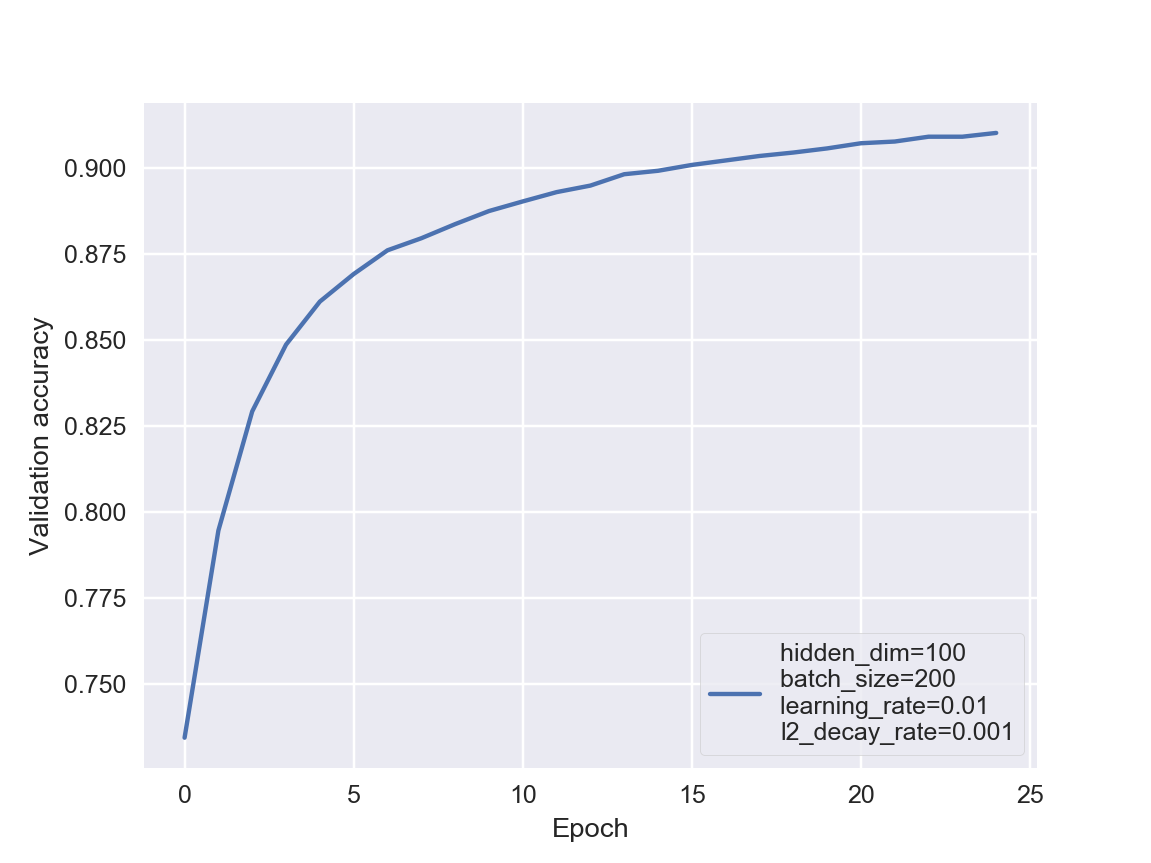

Test set accuracy: 0.9126


In [172]:
mlp = MLPClassifier(hidden_dim=100)
mlp.set_fit_params(batch_size=200, lr=0.01, l2_decay_rate=0.001, num_epochs=25)
mlp.fit(train_set)
mlp.plot_validation_accuracy()
mlp.report_test_accuracy(test_set)

***